# JC3503 Assignment - Student Records

---

Student Name: 

Student Email: 

Student ID: 

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### 1. Introduction

In this project, I analyzed a dataset of students. The tasks include data cleaning and preprocessing, analyzing academic performance, examining the relationship between personal factors and academic results, and investigating how personal factors influence the completion of studies. Additionally, I classified students into different groups and suggested educational strategies tailored to each group. Finally, I summarized the findings and insights gained from the analysis. In this report, I will describe the operations performed, analyze the results, and provide my opinions and takeaways.

### 2. Data Preprocessing

Data preprocessing is essential to prepare the dataset for analysis by cleaning, transforming, and organizing the data.

In this project, the data preprocessing is divided into four main steps:

#### 2.1 Integrate Data Rule

The student dataset is accompanied by a description file that details the meaning, data type, and value range of each field. I implemented this description using a dictionary structure where the dictionary keys are variable names and the values represent the possible values for each variable. If a value is discrete, the dictionary value is a list. If the value is continuous, the dictionary value is a string. This string is comma-separated, with the first element indicating the data type, and the second and third elements specifying the upper and lower limits. 

A function `check_data_validity` will utilize the provided dictionary to validate the data during the reading process. If any discrepancies are found, error messages will be displayed on the screen. During validation, fields will be categorized into two lists: discrete_columns and continuous_columns. The function will return True if all checks pass; otherwise, it will return False.



In [7]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

def check_data_validity(df):
    structure = {
        "Marital status": [1, 2, 3, 4, 5, 6],
        "Application mode": [1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57],
        "Application order": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        "Course": [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991],
        "Daytime/evening attendance": [0, 1],
        "Previous qualification": [
            1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43
        ],
        "Previous qualification (grade)": "Continuous, 0, 200",
        "Nationality": [
            1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109
        ],
        "Mother's qualification": [
            1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44
        ],
        "Father's qualification": [
            1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44
        ],
        "Mother's occupation": [
            0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194
        ],
        "Father's occupation": [
            0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 134, 135, 141, 143, 144, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195
        ],
        "Admission grade": "Continuous,  0, 200",
        "Displaced": [0, 1],
        "Educational special needs": [0, 1],
        "Debtor": [0, 1],
        "Tuition fees up to date": [0, 1],
        "Gender": [0, 1],
        "Scholarship holder": [0, 1],
        "Age at enrollment": "Integer",
        "International": [0, 1],
        "Curricular units 1st sem (credited)": "Integer",
        "Curricular units 1st sem (enrolled)": "Integer",
        "Curricular units 1st sem (evaluations)": "Integer",
        "Curricular units 1st sem (approved)": "Integer",
        "Curricular units 1st sem (grade)": "Continuous, 0，20",
        "Curricular units 1st sem (without evaluations)": "Integer",
        "Curricular units 2nd sem (credited)": "Integer",
        "Curricular units 2nd sem (enrolled)": "Integer",
        "Curricular units 2nd sem (evaluations)": "Integer",
        "Curricular units 2nd sem (approved)": "Integer",
        "Curricular units 2nd sem (grade)": "Continuous, 0，20",
        "Curricular units 2nd sem (without evaluations)": "Integer",
        "Unemployment rate": "Continuous",
        "Inflation rate": "Continuous",
        "GDP": "Continuous",
        "Target": ["Dropout", "Graduate", "Enrolled"]
    }
    df_valid = True
    discrete_columns = []
    continuous_columns = []
    for column, valid_values in structure.items():
        if column in df.columns:
            if isinstance(valid_values, list):
                discrete_columns.append(column)
                # Check if there is an illegal value
                invalid_values = df[~df[column].isin(valid_values)][column]
                if not invalid_values.empty:
                    print(f"Column '{column}' has invalid values: {invalid_values.unique()}")
                    df_valid = False
            elif isinstance(valid_values, str):
                parts = valid_values.split(", ")
                data_type = parts[0]
                if len(parts) == 3:
                    lower_bound = float(parts[1])
                    upper_bound = float(parts[2])
                else:
                    lower_bound = None
                    upper_bound = None

                if data_type == "Continuous":
                    continuous_columns.append(column)
                    if lower_bound is not None and upper_bound is not None:
                        if not ((df[column] >= lower_bound) & (df[column] <= upper_bound)).all():
                            print(f"Column '{column}' has values outside the range [{lower_bound}, {upper_bound}]")
                            df_valid = False
                elif data_type == "Integer":
                    continuous_columns.append(column)
                    if not pd.api.types.is_integer_dtype(df[column]):
                        print(f"Column '{column}' should be integer type.")
                        df_valid = False
                    if lower_bound is not None and upper_bound is not None:
                        if not ((df[column] >= lower_bound) & (df[column] <= upper_bound)).all():
                            print(f"Column '{column}' has values outside the range [{lower_bound}, {upper_bound}]")
                            df_valid = False
                elif column=='Target':
                    # discrete_columns.append(column)
                    invalid_values = df[~df[column].isin(valid_values)][column]
                    print(invalid_values)
                    if not invalid_values.empty:
                        print(f"Column '{column}' has invalid values: {invalid_values.unique()}")
                        df_valid = False

        else:
            print(f"Column '{column}' is missing in the DataFrame.")
            df_valid = False

    return df_valid, discrete_columns, continuous_columns


#### 2.2 Read Data 

Upon reading the CSV file, the following issues were identified and resolved:

- The column name "Daytime/evening attendance" had a trailing Tab character, causing inconvenience. The Tab was removed to correct the name.
- There was a spelling error in the column name "Nationality," which was incorrectly spelled as "Nacionality." The correct spelling was restored.
- A conflict between the rule file and the data was found. The columns "Curricular units 1st sem (grade)" and "Curricular units 2nd sem (grade)" were marked as Integer in the rule file, but the actual data contained decimal values. The rule file was updated to reflect the correct type: "Continuous, 0, 20".

After making these adjustments, the data was successfully read into pandas without any Null values and passed the rule checks.

In [8]:
# Import the data
df = pd.read_csv("student_records.csv", low_memory=False)
# Correct the field name
df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance', 'Nacionality': 'Nationality'}, inplace=True)

# valid the read in data
data_correct, discrete_columns, continuous_columns = check_data_validity(df)
if data_correct:
    print('data read is valid')

# check if there is null value
missing_data = df[df.isnull().any(axis=1)]
print(len(missing_data))


data read is valid
0


#### 2.3 Transforming Data for Analysis

Some columns have too many detailed values, with each value having a small number of records, which is not conducive to data analysis. For example, the marital status column originally has six categories, which I condensed into three: Single/Unmarried, Married/Cohabiting, and Widowed/Divorced/Separated. The Nationality column has 21 categories, which I grouped into four: Portuguese-Speaking Countries, European Countries, Spanish-Speaking Countries, and Eastern Europe.

To better organize the transformed categories, a dictionary named `metric_dict` is used to map each numeric value to its actual name. The dictionary's key is the column name, and the value is another dictionary where the key is the ID and the value is the corresponding name. 

Use the apply function of pandas to call the relevant custom conversion function to complete the data conversion.


In [3]:
# Define conversion functions for each column

def reclassify_marital_status(status):
    if status == 1:
        return 1  # Single/Unmarried
    elif status in [2, 5]:
        return 2  # Married/Cohabiting
    elif status in [3, 4, 6]:
        return 3  # Widowed/Divorced/Separated
    
def reclassify_application_mode(mode):
    if mode in [1, 2, 10, 17, 18, 26, 27]:
        return 1  # General and Specific Programs
    elif mode in [5, 16, 39]:
        return 2  # Special Contingent and Over 23 Years Old
    elif mode in [7, 44, 53]:
        return 3  # Holders of Higher Courses
    elif mode in [15, 57]:
        return 4  # International Students
    elif mode in [42, 43, 51]:
        return 5  # Transfer and Change of Course

def reclassify_course(course):
    if course in [33, 9003, 9119]:
        return 1  # Science and Engineering
    elif course in [171, 9070, 9670, 9773]:
        return 2  # Arts and Design
    elif course in [9238, 9853, 9147, 9254]:
        return 3  # SME
    elif course in [9085, 9500, 9556]:
        return 4  # Health and Nursing
    elif course == 9130:
        return 5  # Specialized Fields
    elif course in [8014, 9991]:
        return 6  # Evening Programs

def reclassify_previous_education_level(qualification):
    if qualification in [9, 10, 12, 14, 15, 19, 38]:
        return 1  # Basic
    elif qualification == 1:
        return 2  # Secondary
    elif qualification in [2, 3, 40]:
        return 3  # Bachelor's
    elif qualification in [4, 43]:
        return 4  # Master's
    elif qualification == 5:
        return 5  # Doctorate
    elif qualification in [6, 39, 42]:
        return 6  # Technical/Professional
    
def reclassify_nationality(nationality):
    if nationality in [1, 21, 22, 24, 25, 26, 41]:
        return 1  # Portuguese-Speaking Countries
    elif nationality in [2, 11, 13, 14, 17, 32, 62]:
        return 2  # European Countries
    elif nationality in [6, 101, 108, 109]:
        return 3  # Spanish-Speaking Countries
    elif nationality in [100, 103, 105]:
        return 4  # Eastern Europe and CIS
    
def reclassify_parents_education_level(qualification):
    if qualification in  [1, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 37, 38]:
        return 1  # Basic and Secondary Education:
    elif qualification in [2, 3, 4, 5, 6, 39, 40, 41, 42, 43, 44]:
        return 2  # Higher Education
    elif qualification in [34, 35, 36]:
        return 3  # Unknown or Illiterate
    
    
def reclassify_occupation(occupation):
    if occupation in [1, 2, 122, 123, 124, 125, 131, 132, 134, 135, 101, 102, 103, 112, 114, 121, 43, 44, 3]:
        return 1  # Highly Skilled Professionals
    elif occupation in [3, 4, 141, 143, 144, 151, 152, 153, 154, 171, 172, 173, 174, 175, 181, 182, 183, 5]:
        return 2  # Technicians and Intermediate Occupations
    elif occupation in [0, 6, 7, 8, 9, 10, 90, 99, 161, 163, 191, 192, 193, 194, 195]:
        return 3  # Low-skilled or Unskilled Occupations
    else:
        print(f"error error error{occupation}")
    
def reclassify_target(target):
    if target=='Graduate':
        return 1
    elif target=='Enrolled':
        return 2
    else:
        return 3

# Define a dictionary of category names
metric_dict = {
    'Marital status': {
        1: "Single",
        2: "Married",
        3: "Widowed"
    },
    'Application mode': {
        1: "General",
        2: "Special",
        3: "Higher",
        4: "Intl",
        5: "Transfer"
    },
    'Course':{
        1: "SciEng",
        2: "Arts",
        3: "SME",
        4: "Health",
        5: "SpecField",
        6: "Evening"
    },
    'Previous qualification':{
        1: "Basic",
        2: "Secondary",
        3: "Bachelor",
        4: "Master",
        5: "Doctor",
        6: "TechProf"
    },
    'Nationality':{
        1: "PortSpeak",
        2: "Europe",
        3: "SpanSpeak",
        4: "EastEur"
    },
    "Mother's qualification":{
        1: "BasicSec",
        2: "HigherEd",
        3: "Illiterate"
    },
    "Father's qualification":{
        1: "BasicSec",
        2: "HigherEd",
        3: "Illiterate"
    },
    "Mother's occupation":{
        1: "Skilled",
        2: "Technic",
        3: "Unskilled"
    },
    "Father's occupation":{
        1: "Skilled",
        2: "Technic",
        3: "Unskilled"
    },
    "Target":{
        1: "Graduate",
        2: "Enrolled",
        3: "Dropout"
    },
    "Displaced":{
        0: "No",
        1: "Yes"
    },
    "Educational special needs":{
        0: "No",
        1: "Yes"
    }, 
    "Debtor":{
        0: "No",
        1: "Yes"
    }, 
    "Tuition fees up to date":{
        0: "No",
        1: "Yes"
    },
    "Gender":{
        1: "Male",
        0: "Femail"
    },
    "Scholarship holder":{
        0: "No",
        1: "Yes"
    },
    "International":{
        0: "No",
        1: "Yes"
    },
}

# Convert data in each column
df['Marital status'] = df['Marital status'].apply(reclassify_marital_status)
df['Application mode'] = df['Application mode'].apply(reclassify_application_mode)
df['Course'] = df['Course'].apply(reclassify_course)
df['Previous qualification'] = df['Previous qualification'].apply(reclassify_previous_education_level)
df['Nationality'] = df['Nationality'].apply(reclassify_nationality)
df["Mother's qualification"] = df["Mother's qualification"].apply(reclassify_parents_education_level)
df["Father's qualification"] = df["Father's qualification"].apply(reclassify_parents_education_level)
df["Mother's occupation"] = df["Mother's occupation"].apply(reclassify_occupation)
df["Father's occupation"] = df["Father's occupation"].apply(reclassify_occupation)
df['Target'] = df['Target'].apply(reclassify_target).astype('int64')

# Check for exceptions after conversion
missing_data = df[df.isnull().any(axis=1)]
print(len(missing_data))

columns_with_missing = df.columns[df.isnull().any()].tolist()

# Print column names containing null values
print("Columns with missing values:")
for column in columns_with_missing:
    missing_rows = df[df[column].isnull()]
    print(f"\nRows with missing values in column '{column}':")
    print(missing_rows)

print(df[columns_with_missing])

df_discrete = df[discrete_columns]
df_continuous = df[continuous_columns]



0
Columns with missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[4424 rows x 0 columns]


#### 2.4 Visualizing Data Distribution

The purpose of this step is to visualize the distribution of the dataset's discrete and continuous variables. This helps in understanding the data better and identifying any anomalies.

- **Discrete Variables:**
  1. A function `rename_values` is defined to rename values based on a predefined dictionary `metric_dict`.
  2. The discrete columns are converted to categorical data types.
  3. Count plots are created for each discrete variable to show the frequency of each category. The x-axis labels are renamed for better readability using the `rename_values` function.

- **Continuous Variables:**
  1. Histograms are plotted for each continuous variable to show their distributions.
  2. The histograms also include a kernel density estimate (KDE) to visualize the data distribution smoothly.

These visualizations provide a clear understanding of the data's distribution, allowing for better analysis and decision-making.

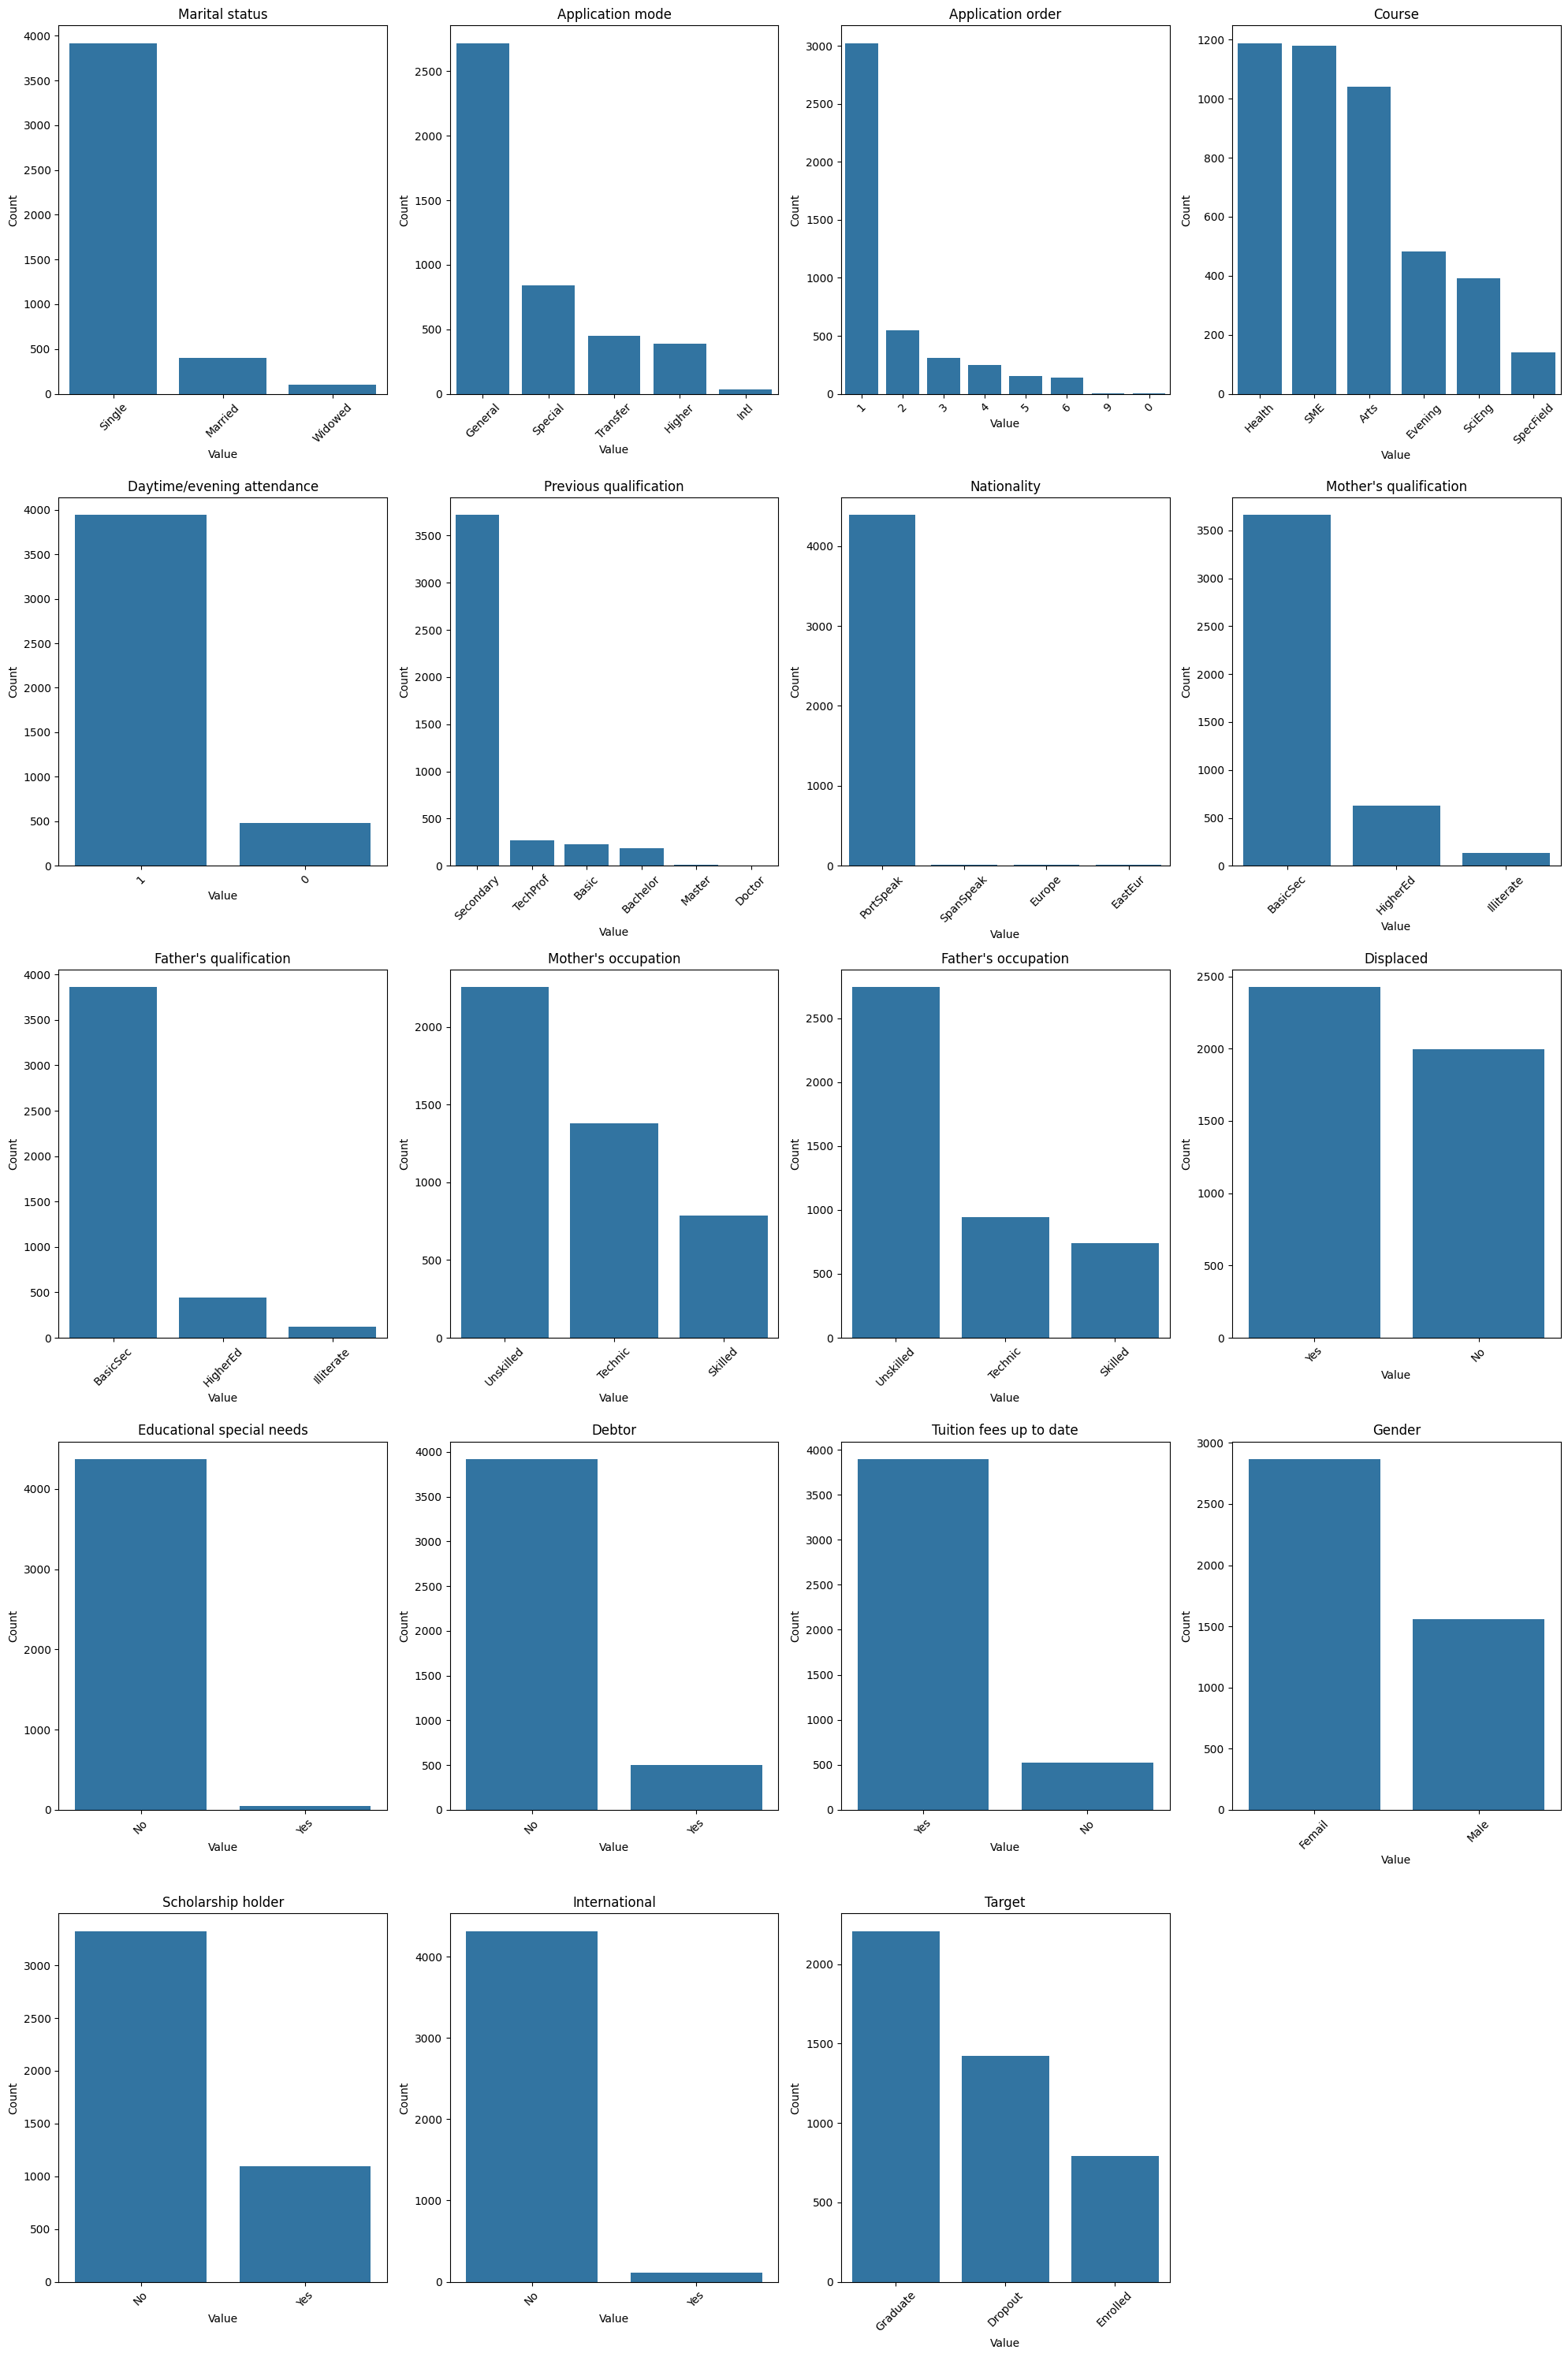

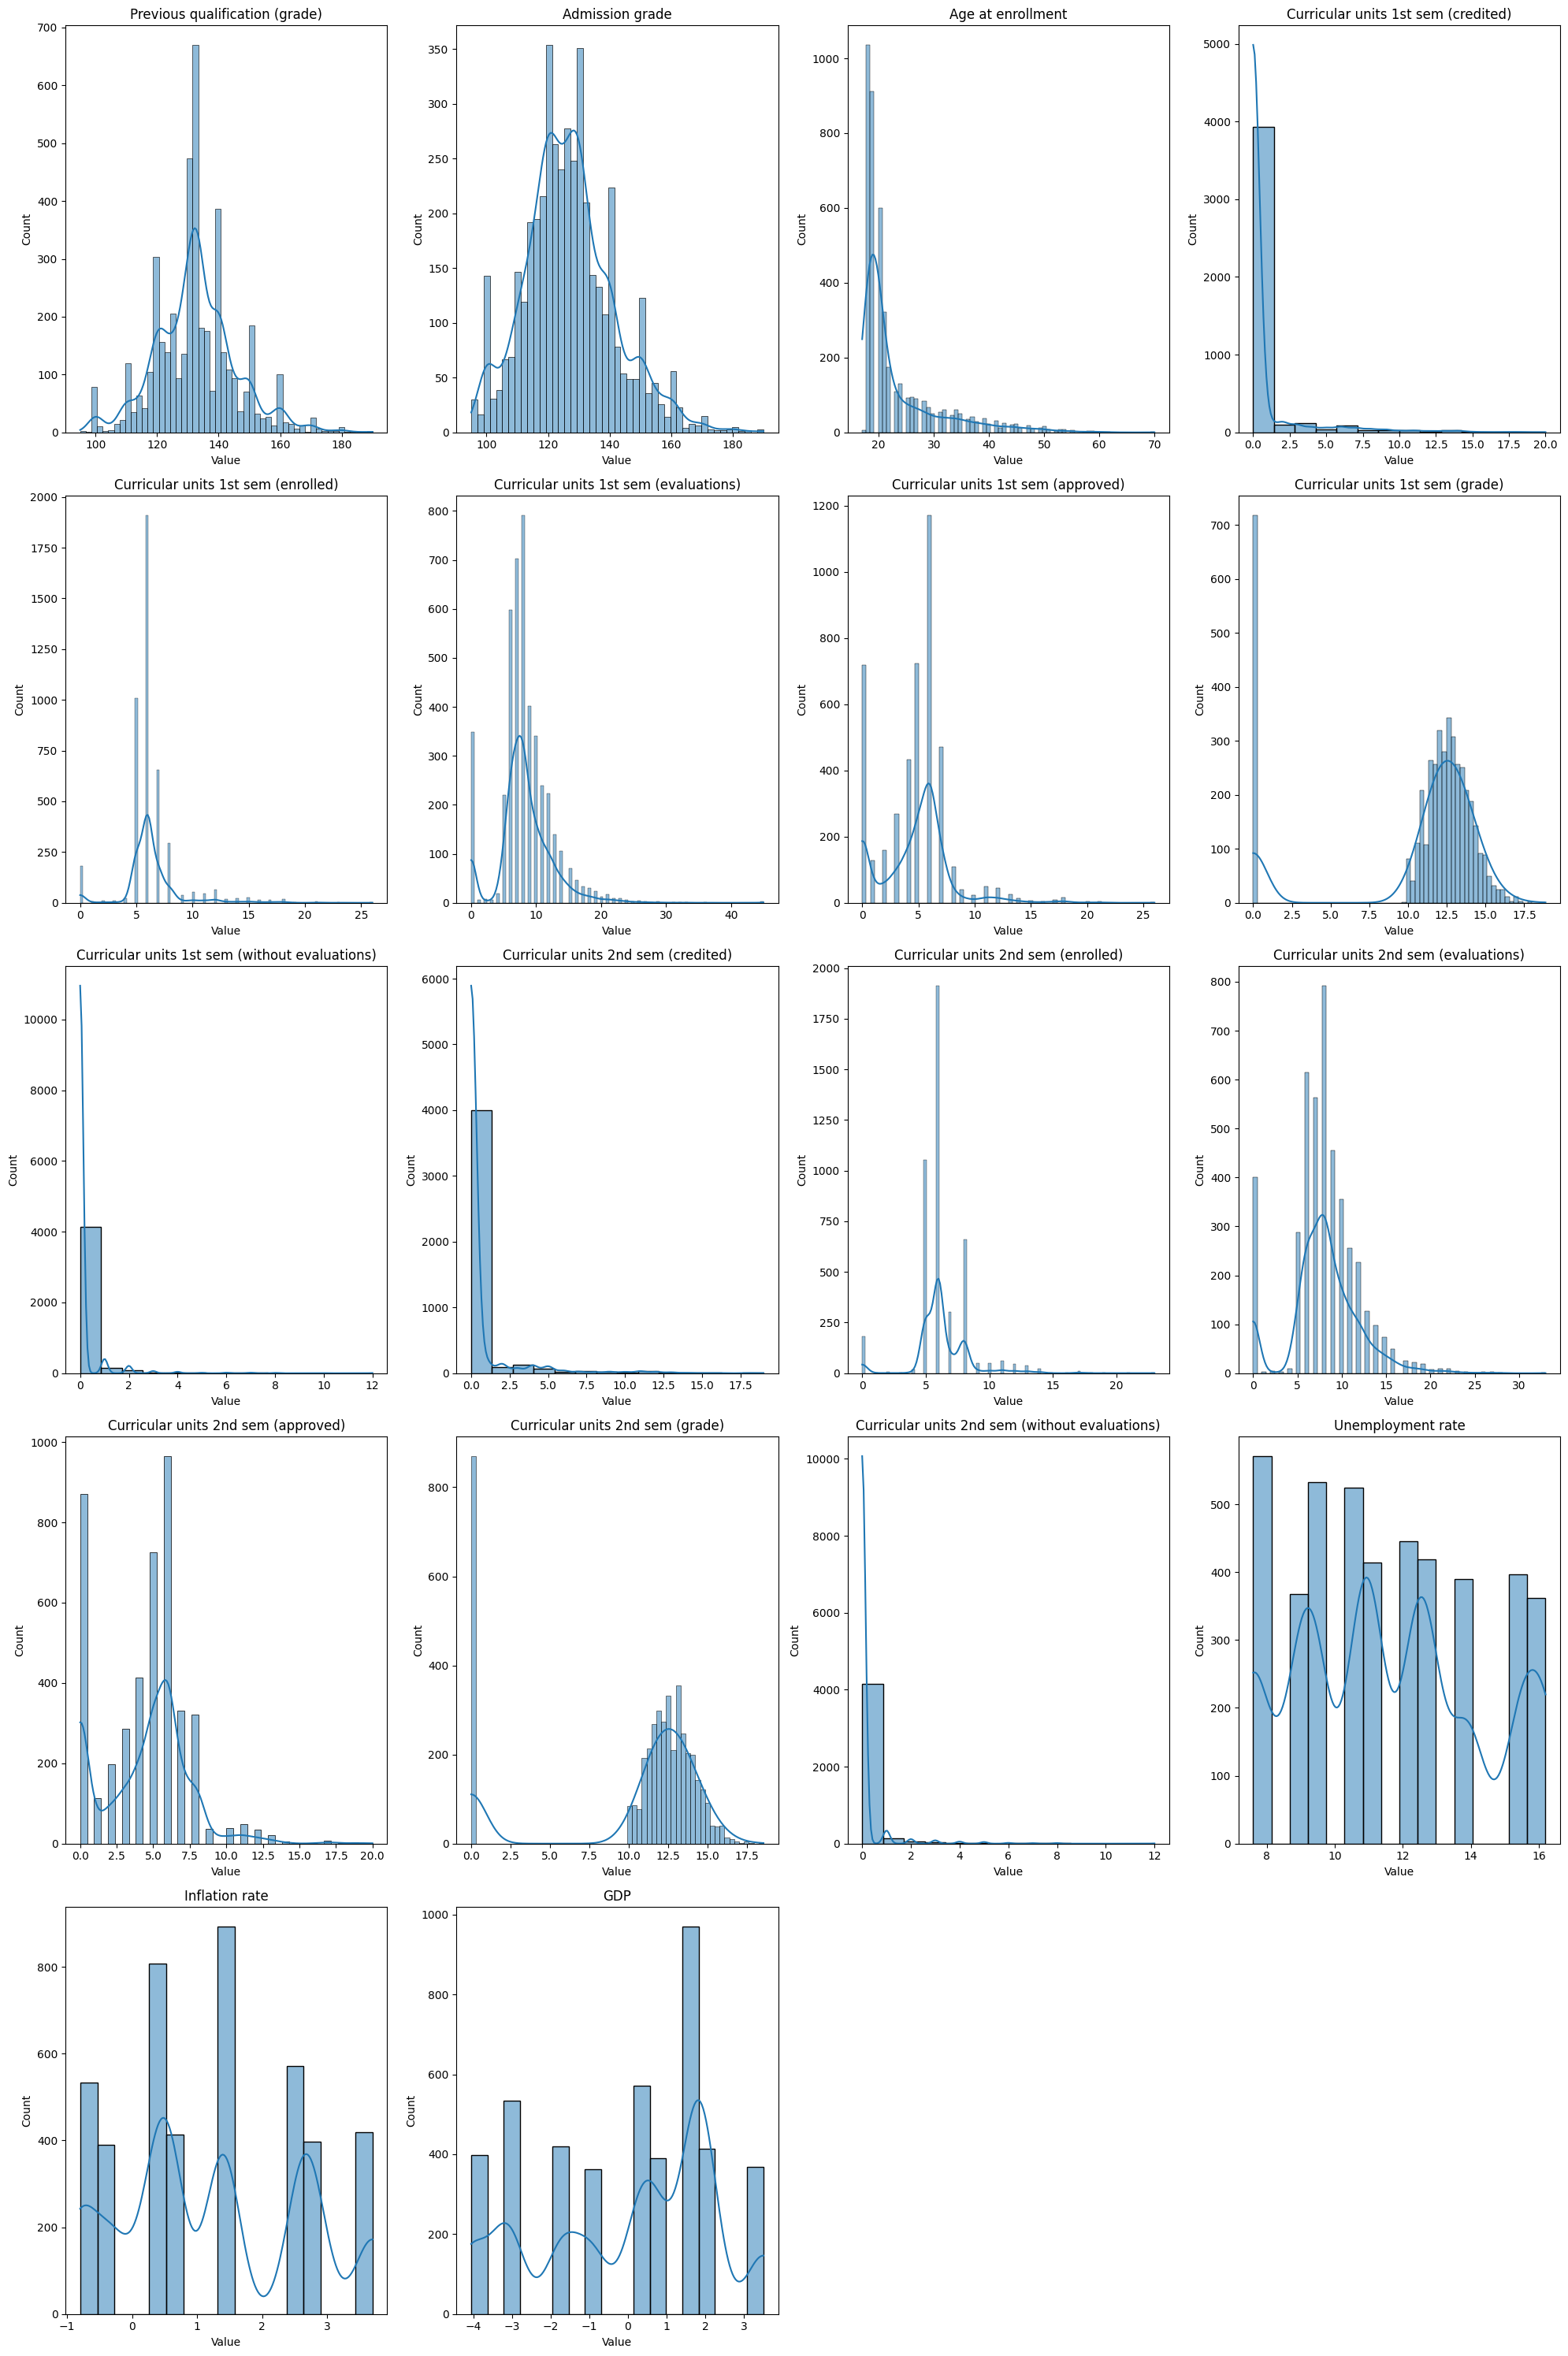

In [6]:
# Function to rename values based on the metric_dict dictionary
def rename_values(category, value):
    mapping = metric_dict.get(category, {})
    return mapping.get(value, value)


# Set the plot size and layout
fig, axes = plt.subplots(len(discrete_columns) // 4 + 1, 4, figsize=(20, 30))

for col in discrete_columns:
    df[col] = df[col].astype('category')

# Plot the count of each discrete variable
for i, col in enumerate(discrete_columns):
    ax = axes[i // 4, i % 4]
    sns.countplot(x=col, data=df_discrete, ax=ax, order=df_discrete[col].value_counts().index)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

    plt.draw()

    labels = [rename_values(col, int(float(tick.get_text()))) for tick in ax.get_xticklabels()]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels, rotation=45)
    
# Remove empty subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

# Plot the histograms of continuous variables
fig, axes = plt.subplots(len(continuous_columns) // 4 + 1, 4, figsize=(20, 30))

for i, col in enumerate(continuous_columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(df_continuous[col], kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])


plt.tight_layout()
plt.show()

### 3. Analysis of Academic Performance Metrics

In the dataset, there are 12 semester-related academic performance metrics. These metrics can be referred to as academic performance indicators. The indicators are as follows:

- Curricular units 1st sem (credited), Curricular units 2nd sem (credited)
- Curricular units 1st sem (enrolled), Curricular units 2nd sem (enrolled)
- Curricular units 1st sem (evaluations), Curricular units 2nd sem (evaluations)
- Curricular units 1st sem (approved), Curricular units 2nd sem (approved)
- Curricular units 1st sem (grade), Curricular units 2nd sem (grade)
- Curricular units 1st sem (without evaluations), Curricular units 2nd sem (without evaluations)

I conducted three analyses on these academic performance indicators.

#### 3.1 Comparison of Semester Performance Indicators

The density plots compare the distribution of academic performance indicators between the 1st and 2nd semesters. This analysis helps to determine whether the performance metrics are consistent across the two semesters.

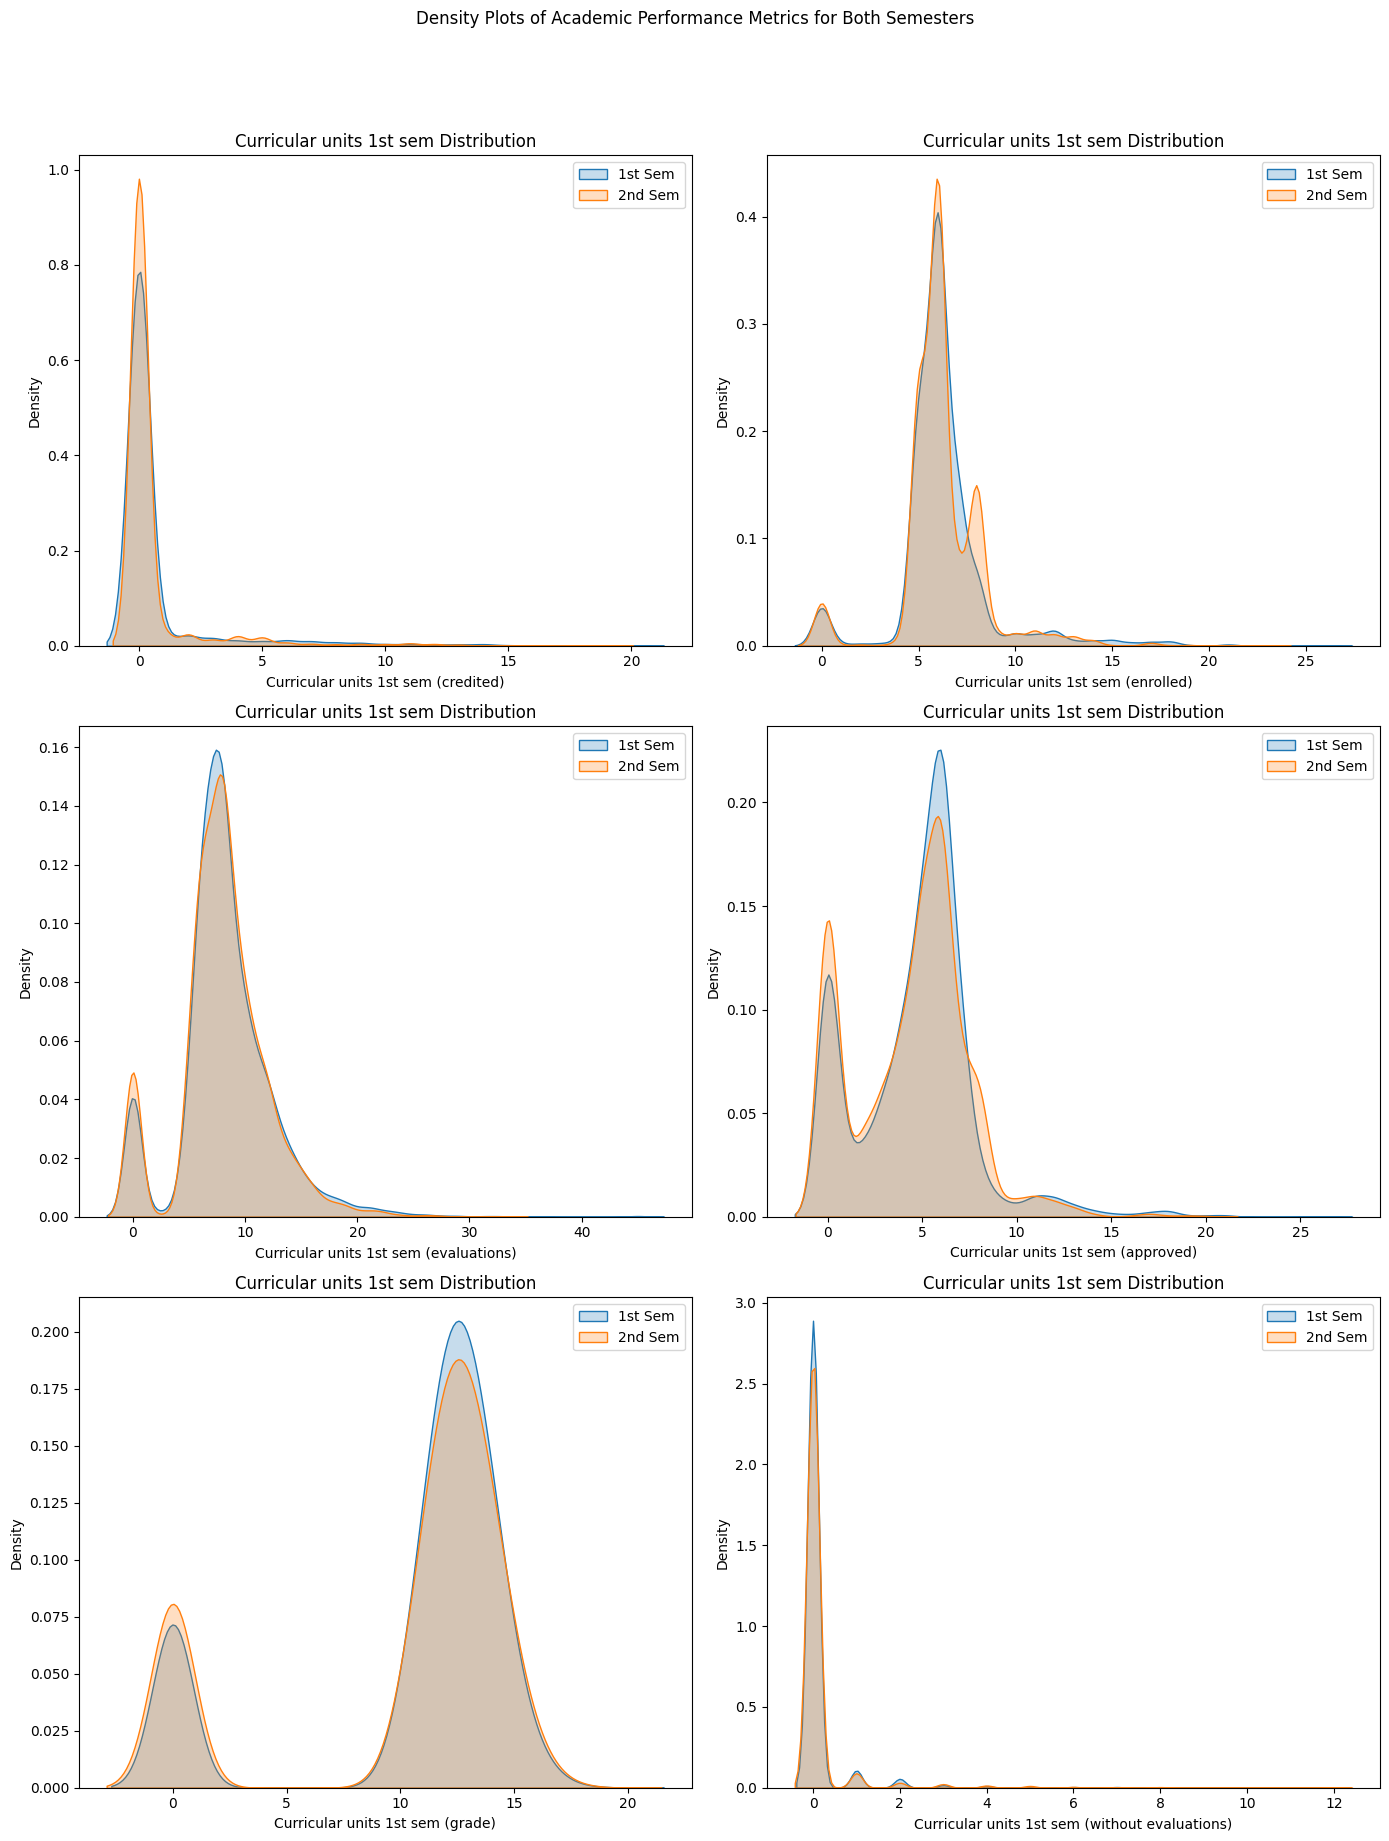

In [45]:

# Select the metrics to compare
columns_to_compare = [
    ('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)'),
    ('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)'),
    ('Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)'),
    ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'),
    ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'),
    ('Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)')
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# Plot paired density plots
for i, (col1, col2) in enumerate(columns_to_compare):
    sns.kdeplot(df[col1], ax=axes[i], label='1st Sem', fill=True)
    sns.kdeplot(df[col2], ax=axes[i], label='2nd Sem', fill=True)
    axes[i].set_title(f'{col1.split("(")[0].strip()} Distribution')
    axes[i].legend()

# Adjust layout and add a title to the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Density Plots of Academic Performance Metrics for Both Semesters', y=1.02)
plt.show()


#### Analysis of Academic Performance Metrics

The density plots indicate consistent performance across semesters in terms of credited, enrolled, and approved units, as well as evaluations and grades. This suggests that students generally maintain similar academic performance in both the 1st and 2nd semesters.

#### 3.2 Correlation Analysis of Academic Performance Metrics

The purpose of this section is to explore the relationships between different academic performance metrics across two semesters. Understanding these correlations helps in identifying patterns and dependencies between various academic activities and achievements.

Twelve academic performance metrics from both the first and second semesters were selected for analysis. These include metrics such as credited units, enrolled units, evaluations, approved units, grades, and units without evaluations.

A correlation matrix was computed to measure the strength and direction of relationships between the selected metrics.

The correlation matrix was visualized using a heatmap to easily identify strong and weak correlations.



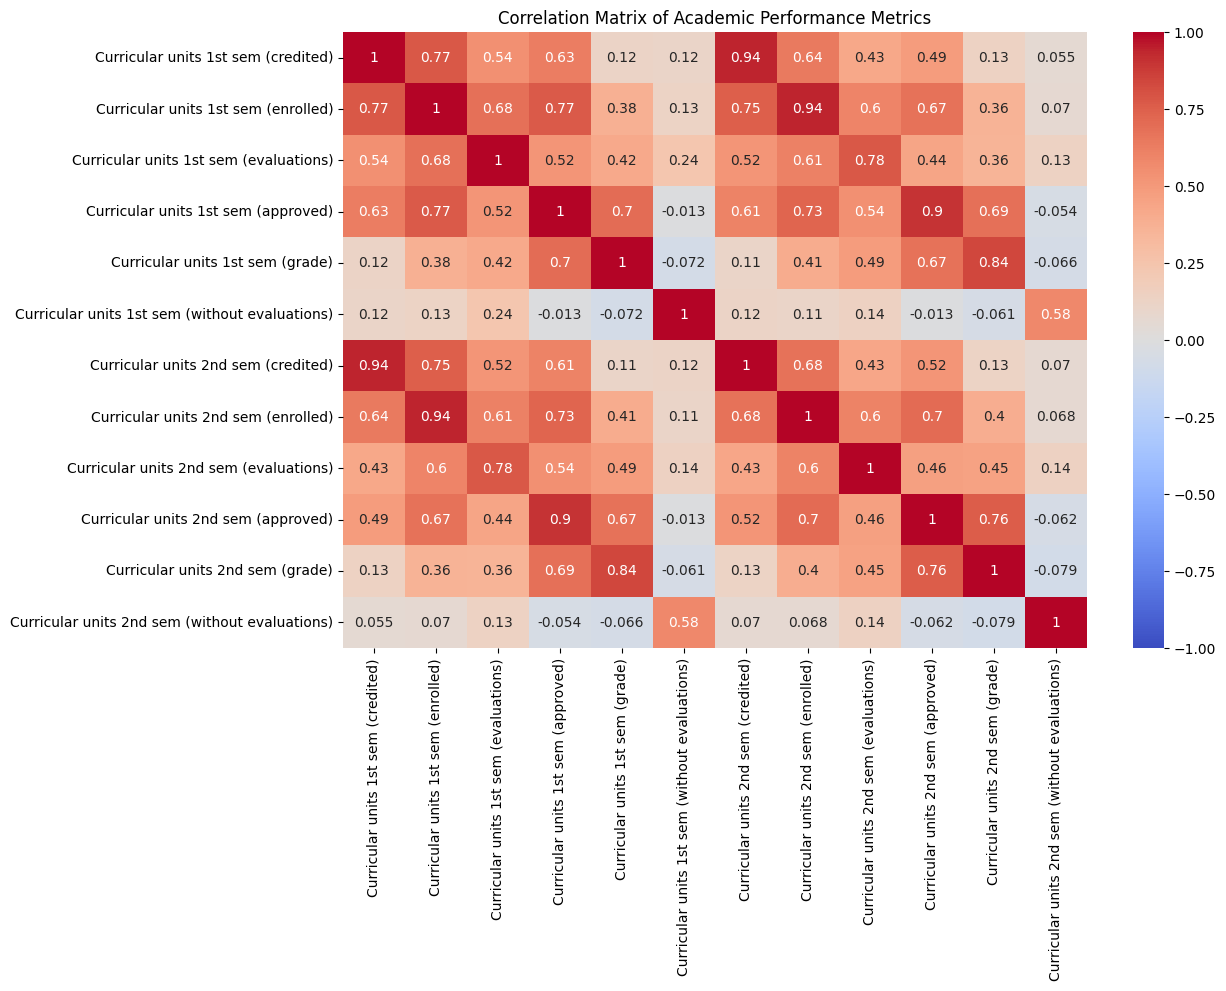

In [35]:
# Select relevant columns for analysis
columns_of_interest = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (without evaluations)',
]

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[columns_of_interest].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Academic Performance Metrics')
plt.show()

#### Analysis of Academic Performance Metrics

1. **Consistent Performance**:
   - There is a strong correlation between curricular units credited in the 1st and 2nd semesters (correlation = 0.94).
   - This indicates that students tend to perform consistently across different semesters.

2. **Enrollment and Approval**:
   - There is a high correlation between curricular units enrolled and approved (correlation = 0.77 for the 1st semester).
   - This suggests that students who enroll in more curricular units usually get more approvals.

3. **Grades and Success**:
   - There is a significant correlation between Curricular units 1st sem (grade) and the number of curricular units approved in the 1st semester (correlation = 0.70).
   - Higher grades indicate better overall performance, with students who score higher also passing more curricular units.

Grades are a reliable indicator of student success. For example, the correlation between Curricular units 1st sem (grade) and the number of curricular units approved in the 1st semester is 0.70, showing that higher grades usually lead to more curricular units being approved.

### 3.3 Analysis of Academic Performance Metrics and Student Outcomes

The relationship between academic performance metrics and student outcomes (graduate, enroll, dropout) is analyzed using box plots. It is evident that academic performance significantly influences student outcomes. 

The analysis highlights that academic performance metrics are indeed correlated with student outcomes. This insight can help in identifying at-risk students early and providing them with the necessary support to improve their academic standing and increase their chances of graduation.

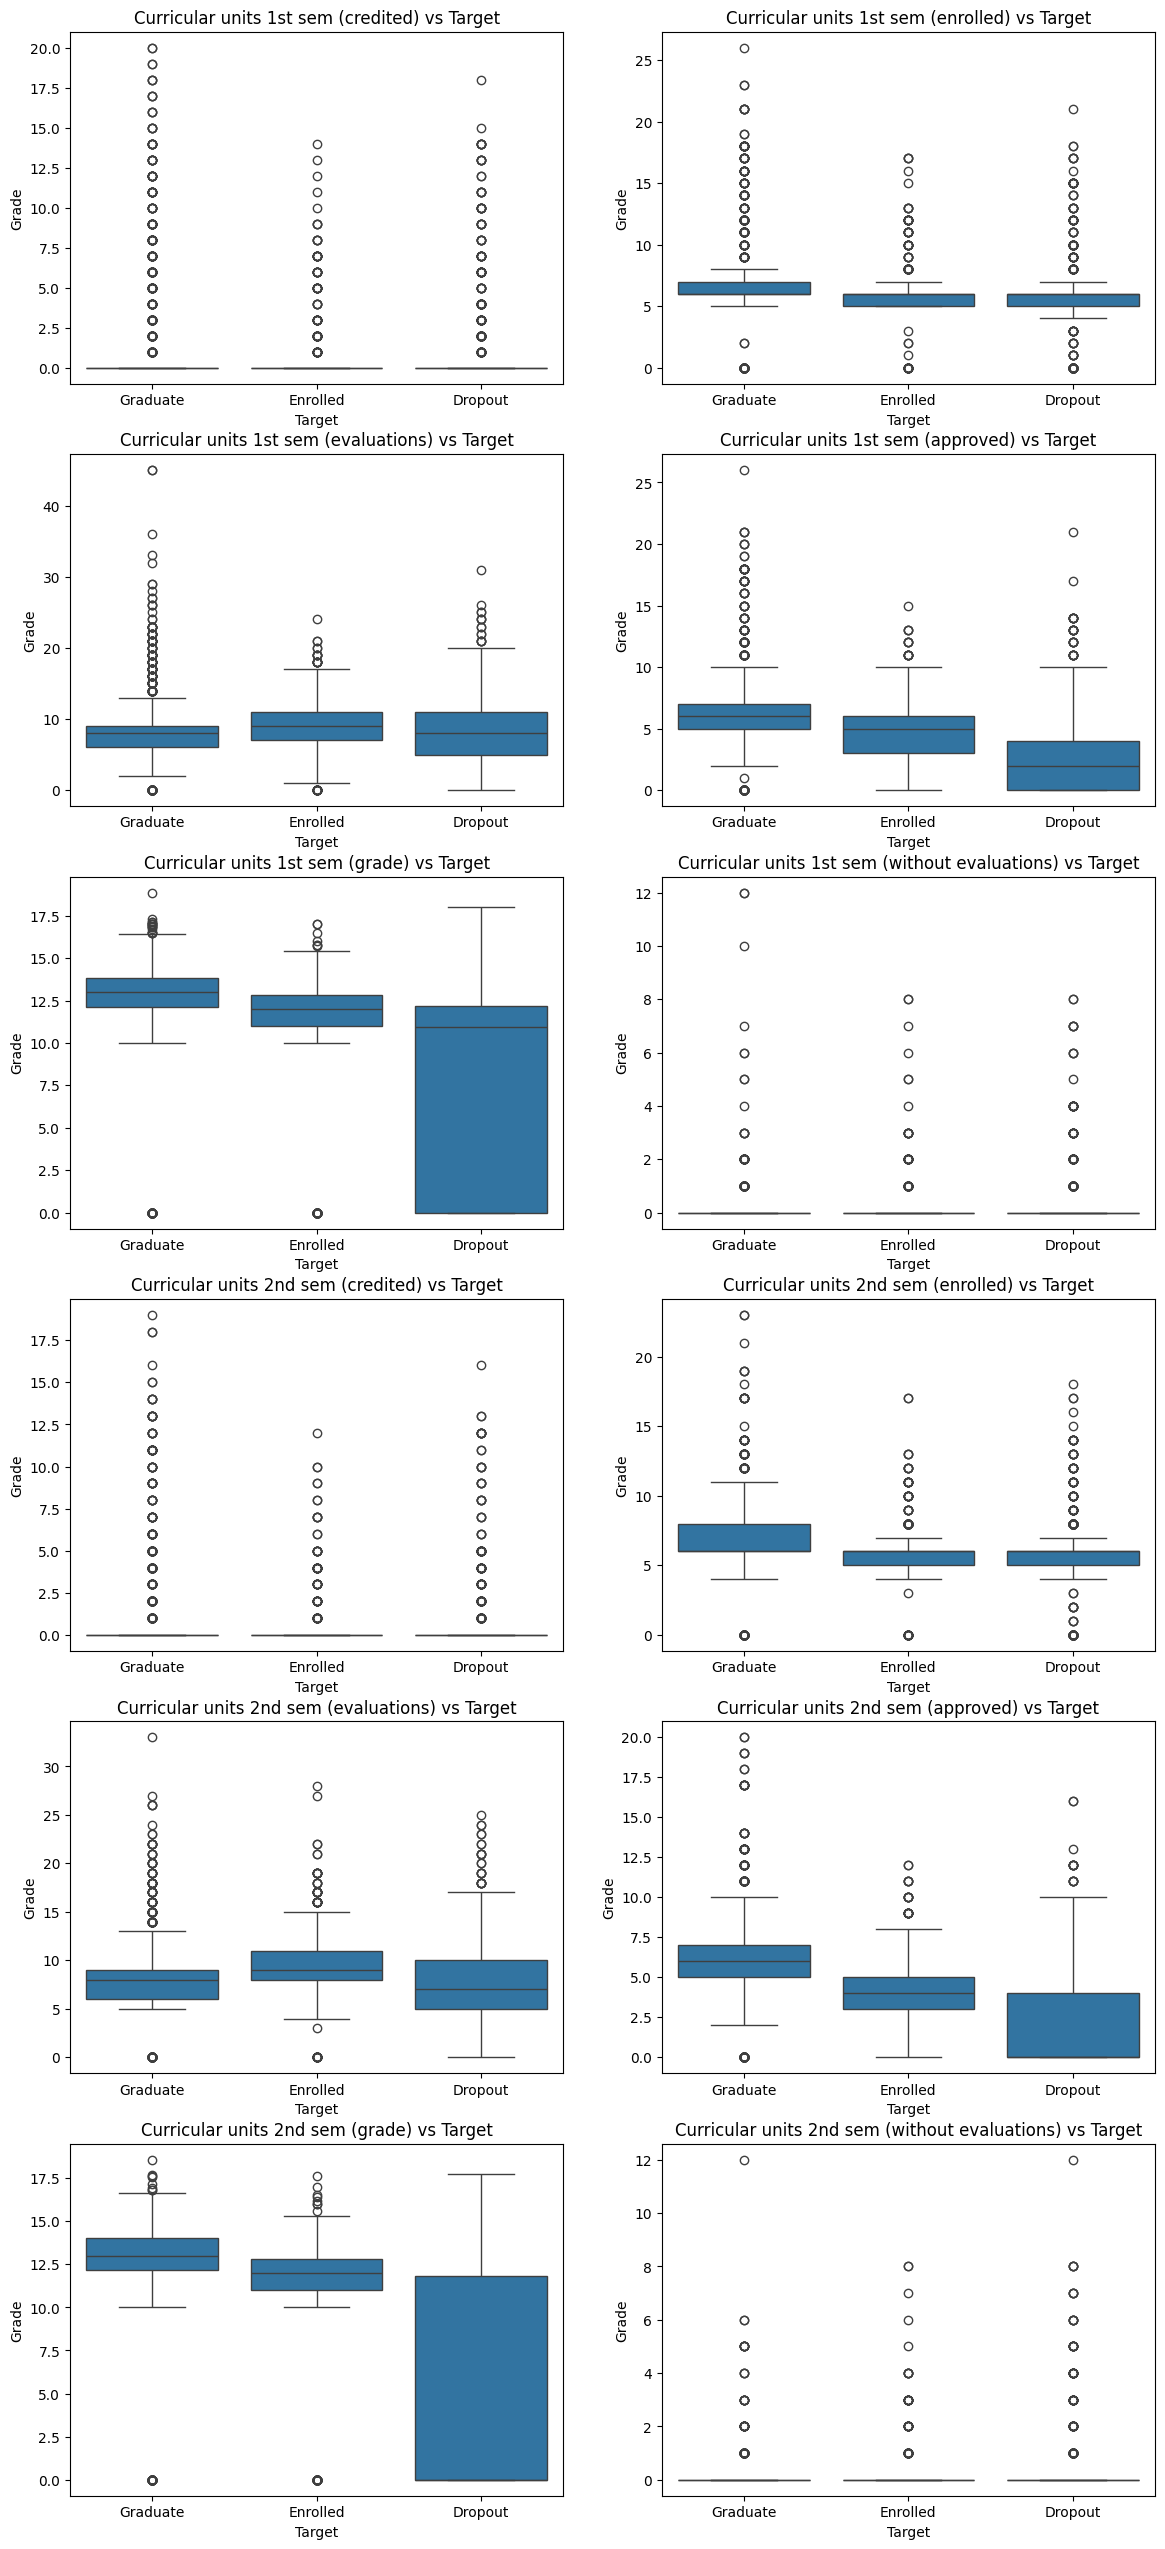

In [37]:
# Select academic performance metrics to analyze
grade_columns = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 
    'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (without evaluations)',
]


# Visualize the relationship between academic performance metrics and the target variable
fig, axes = plt.subplots(6, 2, figsize=(14, 32))

# Plot box plots for each academic performance metric against the target variable
for i, column in enumerate(grade_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x='Target', y=column, data=df, ax=axes[row, col])
    

    axes[row, col].set_title(f'{column} vs Target')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel('Grade')
    labels = [rename_values('Target', int(float(tick.get_text()))) for tick in axes[row, col].get_xticklabels()]
    axes[row, col].set_xticks(axes[row,col].get_xticks())
    axes[row, col].set_xticklabels(labels)



#### Analysis of Box Plots for Academic Performance Metrics and Student Outcomes

The analysis of academic performance metrics against student outcomes (graduate, enrolled, dropout) reveals distinct patterns:

1. **Graduates**:
   - Graduates have higher grades in both the 1st and 2nd semesters.
   - They consistently show a higher number of credited, enrolled, and approved curricular units.

2. **Enrolled Students**:
   - Enrolled students generally fall between graduates and dropouts in terms of grades and curricular units.
   - Their performance is more varied but tends to be better than dropouts.

3. **Dropouts**:
   - Dropouts have noticeably lower grades in both semesters.
   - They also have fewer credited, enrolled, and approved curricular units.

Overall, academic performance metrics are strongly correlated with student outcomes. High grades and a higher number of credited and approved units are indicative of a greater likelihood of graduation. Conversely, lower performance in these areas is associated with a higher likelihood of dropping out.

### 4. Analysis of the Relationship Between Student Characteristics and Academic Performance


In this study, I attempt to discover the relationship between student characteristics and academic performance. The research is divided into two parts. The first part examines the relationship between student personal characteristics and academic performance. The second part analyzes the relationship between parental characteristics and academic performance.

In the previous research, I found positive correlations among the academic performance metrics. To simplify the study, I selected `Curricular units 1st sem (grade)` to represent academic performance

#### 4.1 Relationship Between Personal Characteristics and Academic Performance

The analysis of the relationship between various personal characteristics and academic performance reveals the following insights:

1. **Marital Status**:
   - The box plot shows that students who are single or married have similar academic performance, while those who are widowed have a slightly lower average grade.

2. **Gender**:
   - Female students tend to have higher academic performance compared to male students.

3. **Application Mode**:
   - Students who applied through the special application mode have significantly higher grades, while those who applied through the international or transfer modes have lower average grades.

4. **Application Order**:
   - There is no significant difference in academic performance across different application orders.

5. **Course**:
   - Students enrolled in evening courses have lower average grades compared to those in other courses. Science and technology fields show higher average grades.

6. **Previous Qualification**:
   - Students with a bachelor's degree have higher grades compared to those with lower qualifications, while those with a doctoral degree or technical/professional qualifications have the lowest grades.

7. **Nationality**:
   - Students from Portuguese-speaking countries and European countries perform similarly and have higher grades compared to those from Spanish-speaking countries and Eastern Europe.

8. **International Status**:
   - International students and non-international students show similar academic performance.

9. **Displaced Status**:
   - There is no significant difference in academic performance between displaced and non-displaced students.

10. **Educational Special Needs**:
    - Students with special educational needs have slightly lower academic performance compared to those without.

11. **Debtor Status**:
    - Students who are debtors have lower grades compared to non-debtors.

12. **Tuition Fees Up to Date**:
    - Students with up-to-date tuition fees perform better academically.

13. **Scholarship Holder**:
    - Scholarship holders and non-scholarship holders show similar academic performance.

14. **Admission Grade**:
    - The correlation between the admission grade and `Curricular units 1st sem (grade)` is very low (0.07), indicating almost no relationship between students' admission grades and their first-semester grades.

15. **Age at Enrollment**:
    - There is a slight negative correlation (-0.16) between age at enrollment and `Curricular units 1st sem (grade)`, suggesting that younger students tend to perform slightly better in their first semester compared to older students.

These findings suggest that certain personal characteristics, such as gender, application mode, previous qualification, and tuition fee status, have a noticeable impact on academic performance. Other factors, such as marital status, application order, and international status, show less influence on student grades. Understanding these relationships can help in developing targeted support and interventions to improve student outcomes.

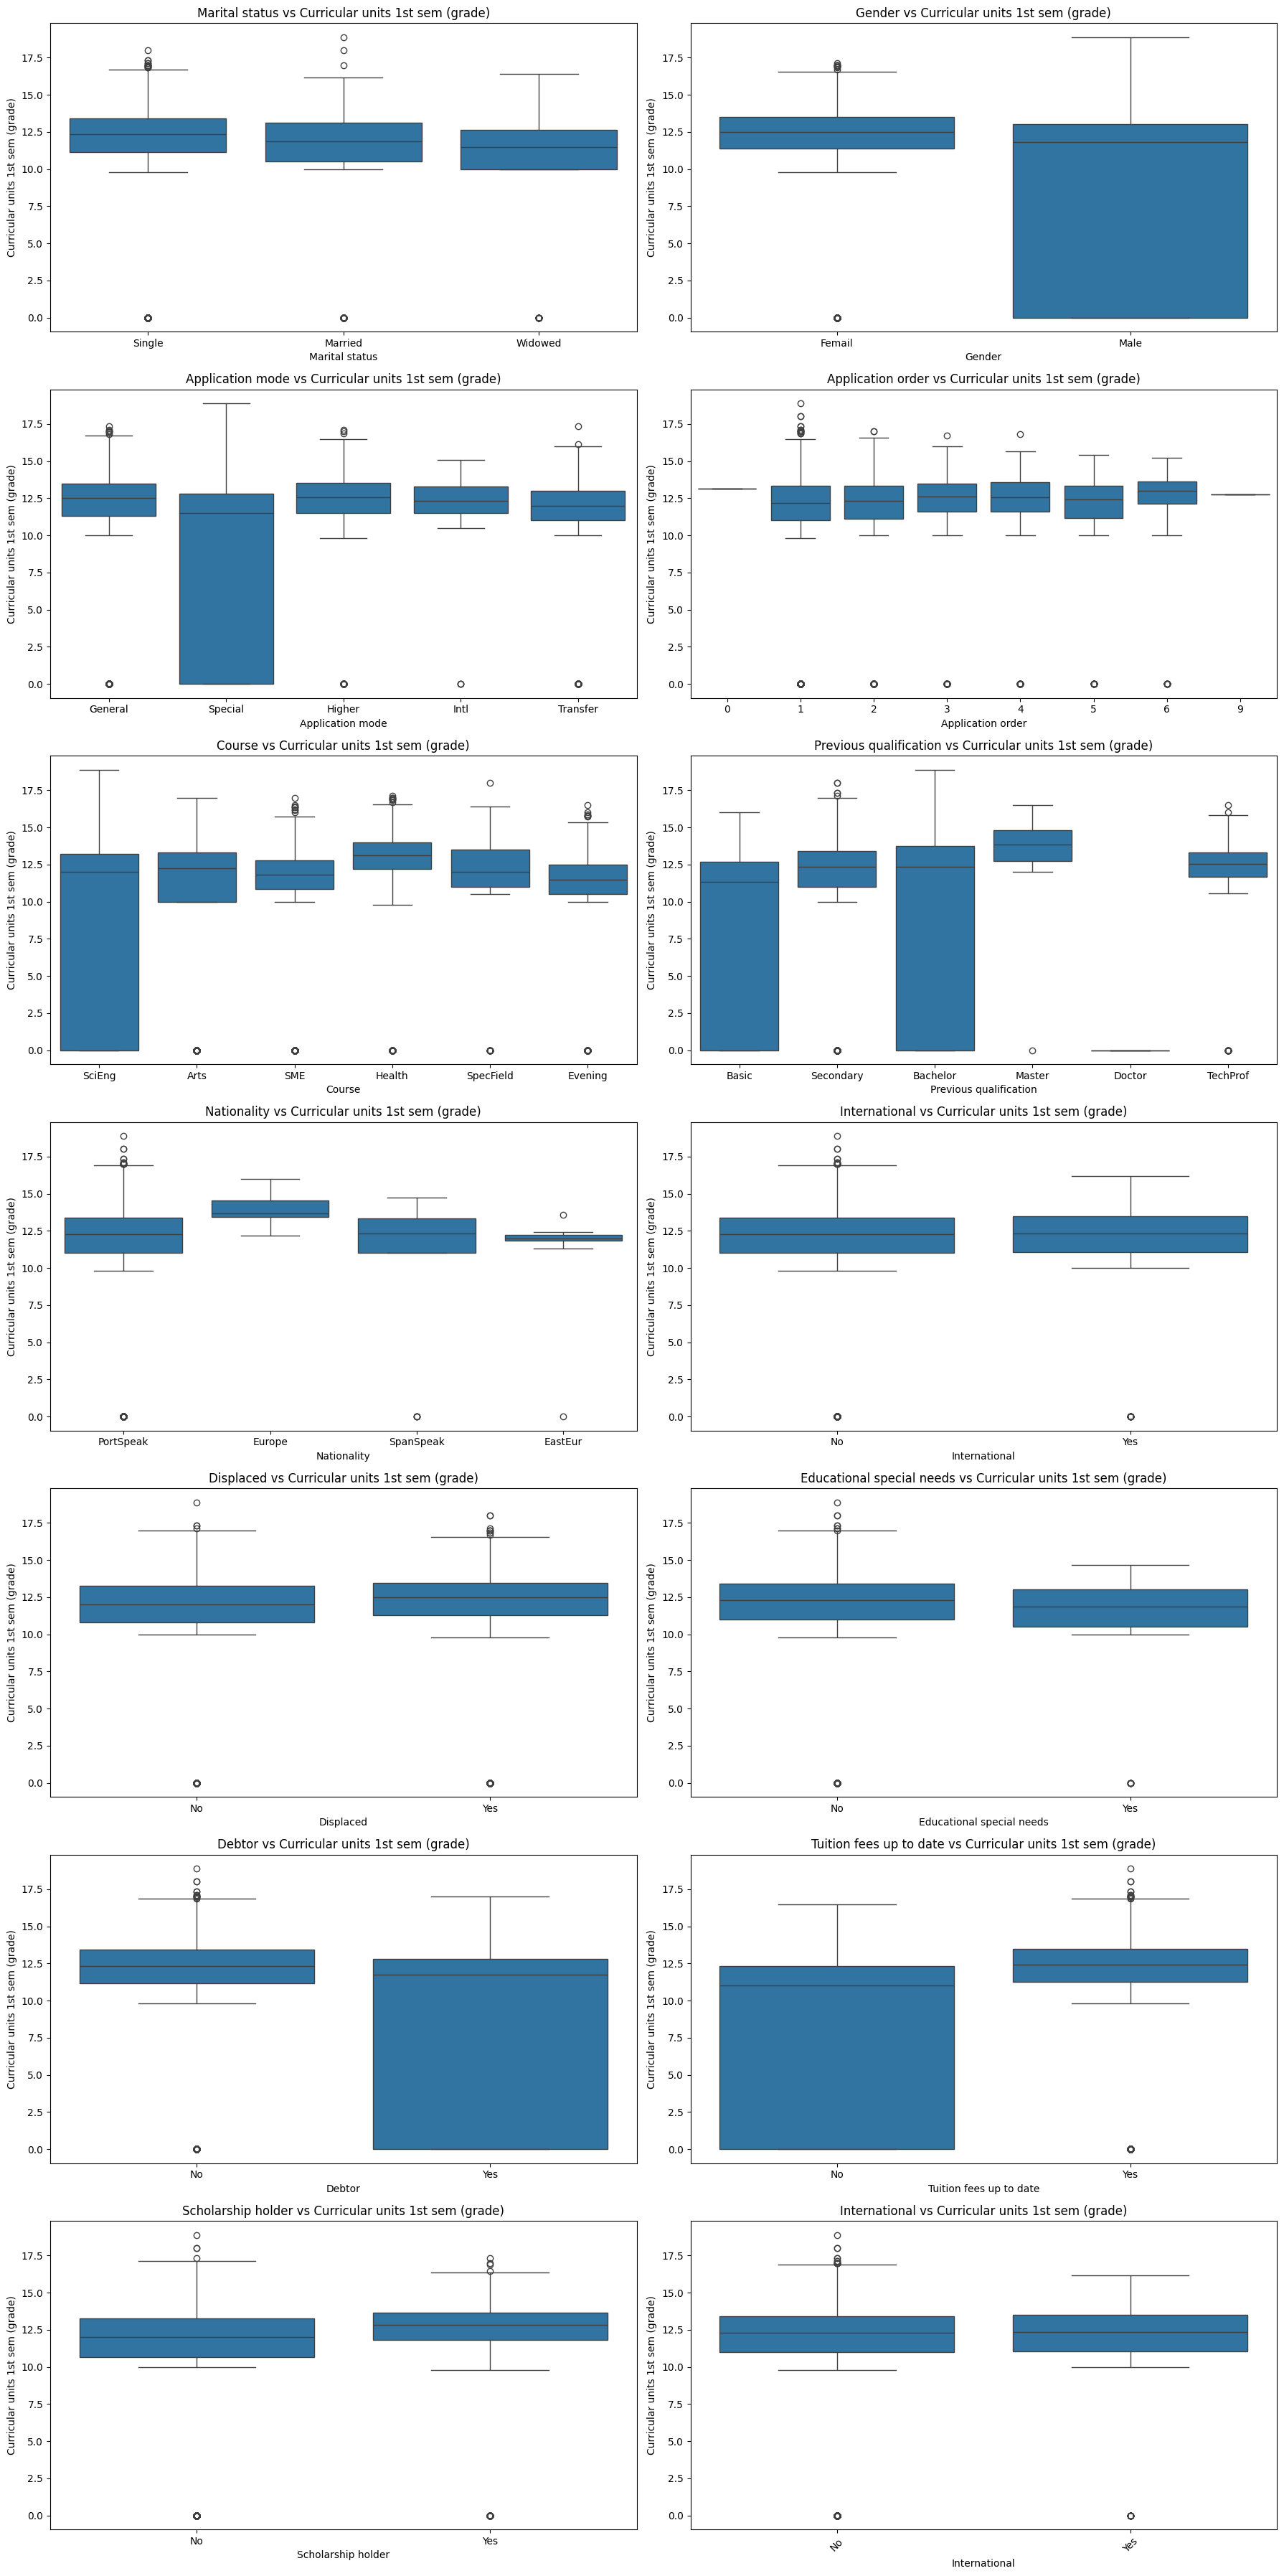

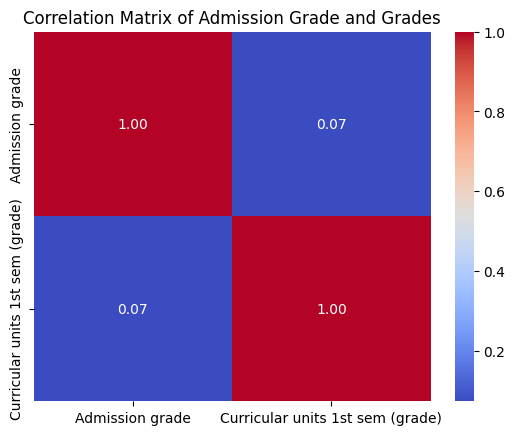

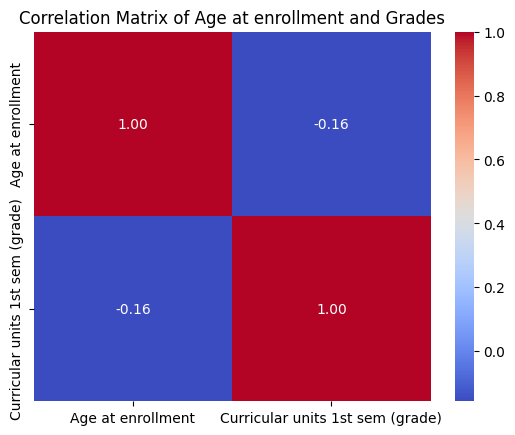

In [39]:
# List of student demographic and categorical columns to analyze
student_columns = ['Marital status',"Gender",'Application mode','Application order',
                   'Course','Previous qualification',
                   'Nationality',"International","Displaced","Educational special needs","Debtor",
                   "Tuition fees up to date","Scholarship holder","International"]

# Grade column to compare against student columns
grade_column = 'Curricular units 1st sem (grade)'

# Create subplots for boxplots
fig, axes = plt.subplots(7, 2, figsize=(18, 36))

# Plotting boxplots for each student column vs grade
for i, col in enumerate(student_columns):
    row = i // 2
    col_num = i % 2
    
    # Create boxplot for each student column against the grade column
    sns.boxplot(x=col, y=grade_column, data=df, ax=axes[row,col_num])
    axes[row, col_num].set_title(f'{col} vs {grade_column}')
    labels = [rename_values(col, int(float(tick.get_text()))) for tick in axes[row, col_num].get_xticklabels()]
    
    # Rename x-tick labels to corresponding values from the metric dictionary
    axes[row, col_num].set_xticks(axes[row,col_num].get_xticks())
    axes[row, col_num].set_xticklabels(labels)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Selecting columns for correlation analysis between admission grade and semester grade
student_columns1 = ['Admission grade', 
                    'Curricular units 1st sem (grade)']

# Calculate and plot the correlation matrix for admission grade and semester grade
correlation_matrix = df[student_columns1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Admission Grade and Grades")
plt.show()

# Selecting columns for correlation analysis between age at enrollment and semester grade
student_columns2 = ['Age at enrollment', 
                    'Curricular units 1st sem (grade)']


# Calculate and plot the correlation matrix for age at enrollment and semester grade
correlation_matrix = df[student_columns2].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Age at enrollment and Grades")
plt.show()





#### 4.2 Relationship Between Parental Characteristics and Academic Performance

Parents have a significant influence on their children's education. I analyzed the impact of parents' education levels and occupations on students' academic performance. The results are evident.

1. **Parental Qualification**:
   - Students whose parents have higher education (HigherEd) or basic/secondary education (BasicSec) perform better than those whose parents are illiterate.

2. **Parental Occupation**:
   - The occupation of both mothers and fathers (whether skilled, technical, or unskilled) does not significantly impact students' academic performance.

['BasicSec', 'HigherEd', 'Illiterate']
['BasicSec', 'HigherEd', 'Illiterate']
['Skilled', 'Technic', 'Unskilled']
['Skilled', 'Technic', 'Unskilled']


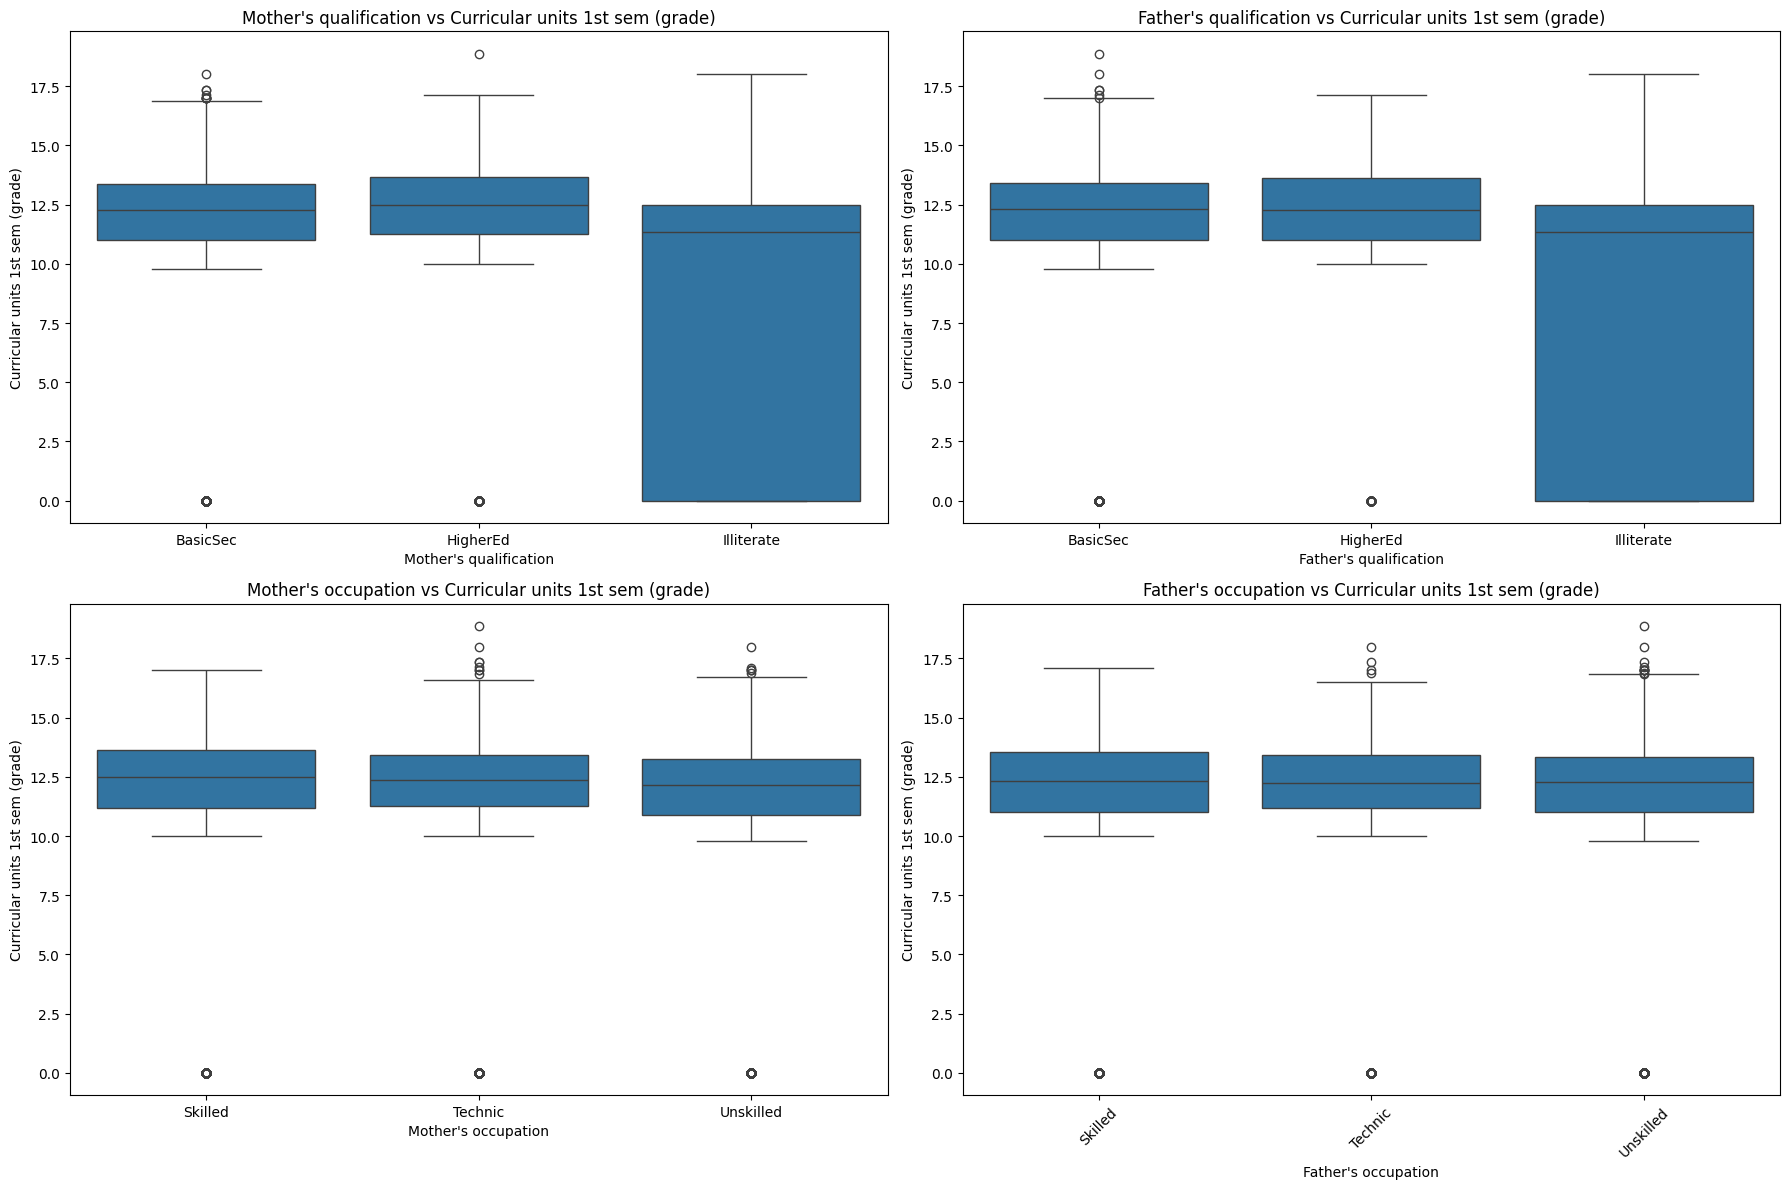

In [40]:
# Define parental education and occupation columns for analysis
parental_columns = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]

# Select the academic performance metric column
grade_column = 'Curricular units 1st sem (grade)'

# Create a 2x2 grid of subplots with specified figure size
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Loop through each parental column to create box plots
for i, col in enumerate(parental_columns):
    # Determine the row and column index for the current subplot
    row = i // 2
    col_num = i % 2
    
    # Create a box plot for the current column against the academic performance metric
    sns.boxplot(x=col, y=grade_column, data=df, ax=axes[row,col_num])
    axes[row, col_num].set_title(f'{col} vs {grade_column}')
    # Rename x-tick labels using the provided function
    labels = [rename_values(col, int(float(tick.get_text()))) for tick in axes[row, col_num].get_xticklabels()]
    print(labels)
    # Set the title of the subplot
    axes[row, col_num].set_xticks(axes[row,col_num].get_xticks())
    axes[row, col_num].set_xticklabels(labels)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 5. Students Classification


Through clustering algorithms, students can be divided into groups with obvious characteristics. This allows for the development of specialized educational strategies for these groups, leading to better student outcomes.

Determining the optimal number of clusters helps in creating meaningful and manageable segments.

First, I used the KMeans clustering algorithm to determine the optimal number of clusters. Once the optimal number of groups was established, the students were classified accordingly. The characteristics of each group were then analyzed to propose effective operational strategies for each group. 


#### 5.1 Determining the Optimal Number of Clusters

To classify the apartments effectively, it is essential to determine the optimal number of clusters. This ensures meaningful segmentation and aids in developing targeted business strategies. The process to determine the optimal number of clusters involves the following steps:

1. **Applying KMeans Clustering**:
   The KMeans clustering algorithm is applied with different values of `k` (number of clusters) ranging from 2 to 9. For each value of `k`, the model is evaluated based on:
   - **Inertia**: The sum of squared distances of samples to their closest cluster center. Lower inertia values indicate tighter clusters and more coherent grouping of the data points.
   - **Silhouette Score**: A measure of how similar an object is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined and more distinct clusters.
   - **Fit Time**: The time taken to fit the model, ensuring the clustering process is computationally feasible.

2. **Evaluating Results**:
   Based on the silhouette score and inertia plot, the optimal number of clusters for KMeans clustering is 3. Here's the reasoning:

   - The silhouette score is highest at \( k = 3 \), indicating that this number of clusters provides the best separation and cohesion among the clusters.

   - While inertia (the sum of squared distances to the nearest cluster center) continues to decrease as \( k \) increases, the silhouette score drops significantly after \( k = 3 \), suggesting that increasing the number of clusters beyond 3 does not improve the clustering quality and might lead to overfitting.

   

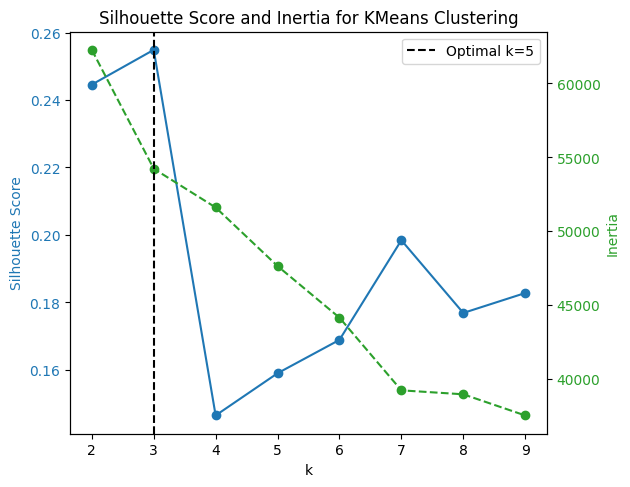

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
# Select relevant features for clustering
features = [
    'Admission grade', 
    'Age at enrollment', 
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',
    "Daytime/evening attendance",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
]

# Preprocess the data
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))


# Plotting the results
fig, ax1 = plt.subplots()

# Plot silhouette scores
color = 'tab:blue'
ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(range(2, 10), silhouette_scores, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# # Plot fit times on a secondary y-axis
# ax2 = ax1.twinx()
# color = 'tab:green'
# ax2.set_ylabel('Fit Time (seconds)', color=color)
# ax2.plot(range(2, 10), fit_times, 'o--', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# Plot fit times on a secondary y-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Inertia', color=color)
ax2.plot(range(2, 10), inertia, 'o--', color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.title('Silhouette Score and Inertia for KMeans Clustering')
plt.axvline(x=3, color='k', linestyle='--', label='Optimal k=5')
plt.legend()
plt.show()


#### 5.2 Clustering and Visualizing Apartment Data

The following code performs clustering to divide the apartment data into five categories. This is done in three main steps:

1. **Clustering**:
   The KMeans algorithm is used to cluster the data into five groups based on selected features.

2. **Dimensionality Reduction for Visualization**:
   Principal Component Analysis (PCA) is applied to reduce the data to two dimensions. This allows us to visualize the clustering results using a scatter plot. Each point represents a student, colored by its assigned cluster.

3. **Visualizing Cluster Characteristics**:
   The characteristics of each cluster are displayed in two ways:
   - **Bar Charts**: The center values of each cluster for all features are shown using bar charts.
   - **Box Plots**: The distribution of each feature within each cluster is depicted using box plots, allowing us to see the range and variability of each feature across different clusters.


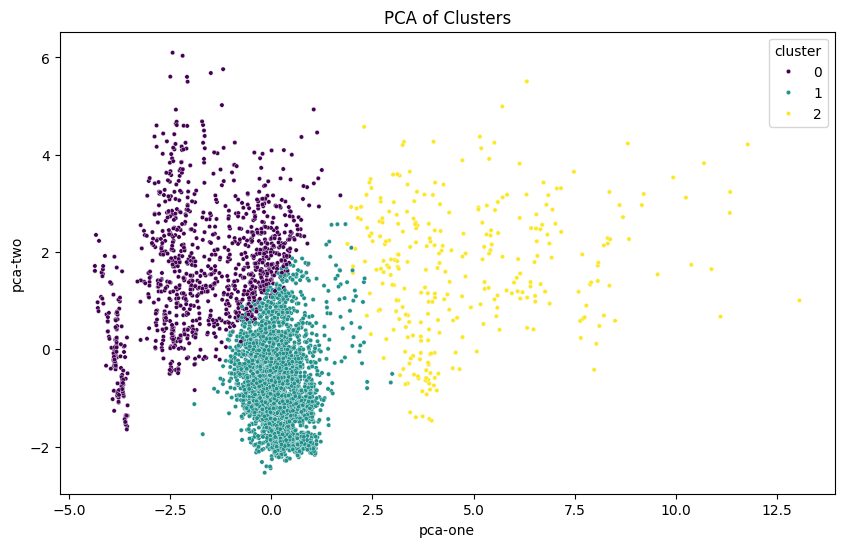

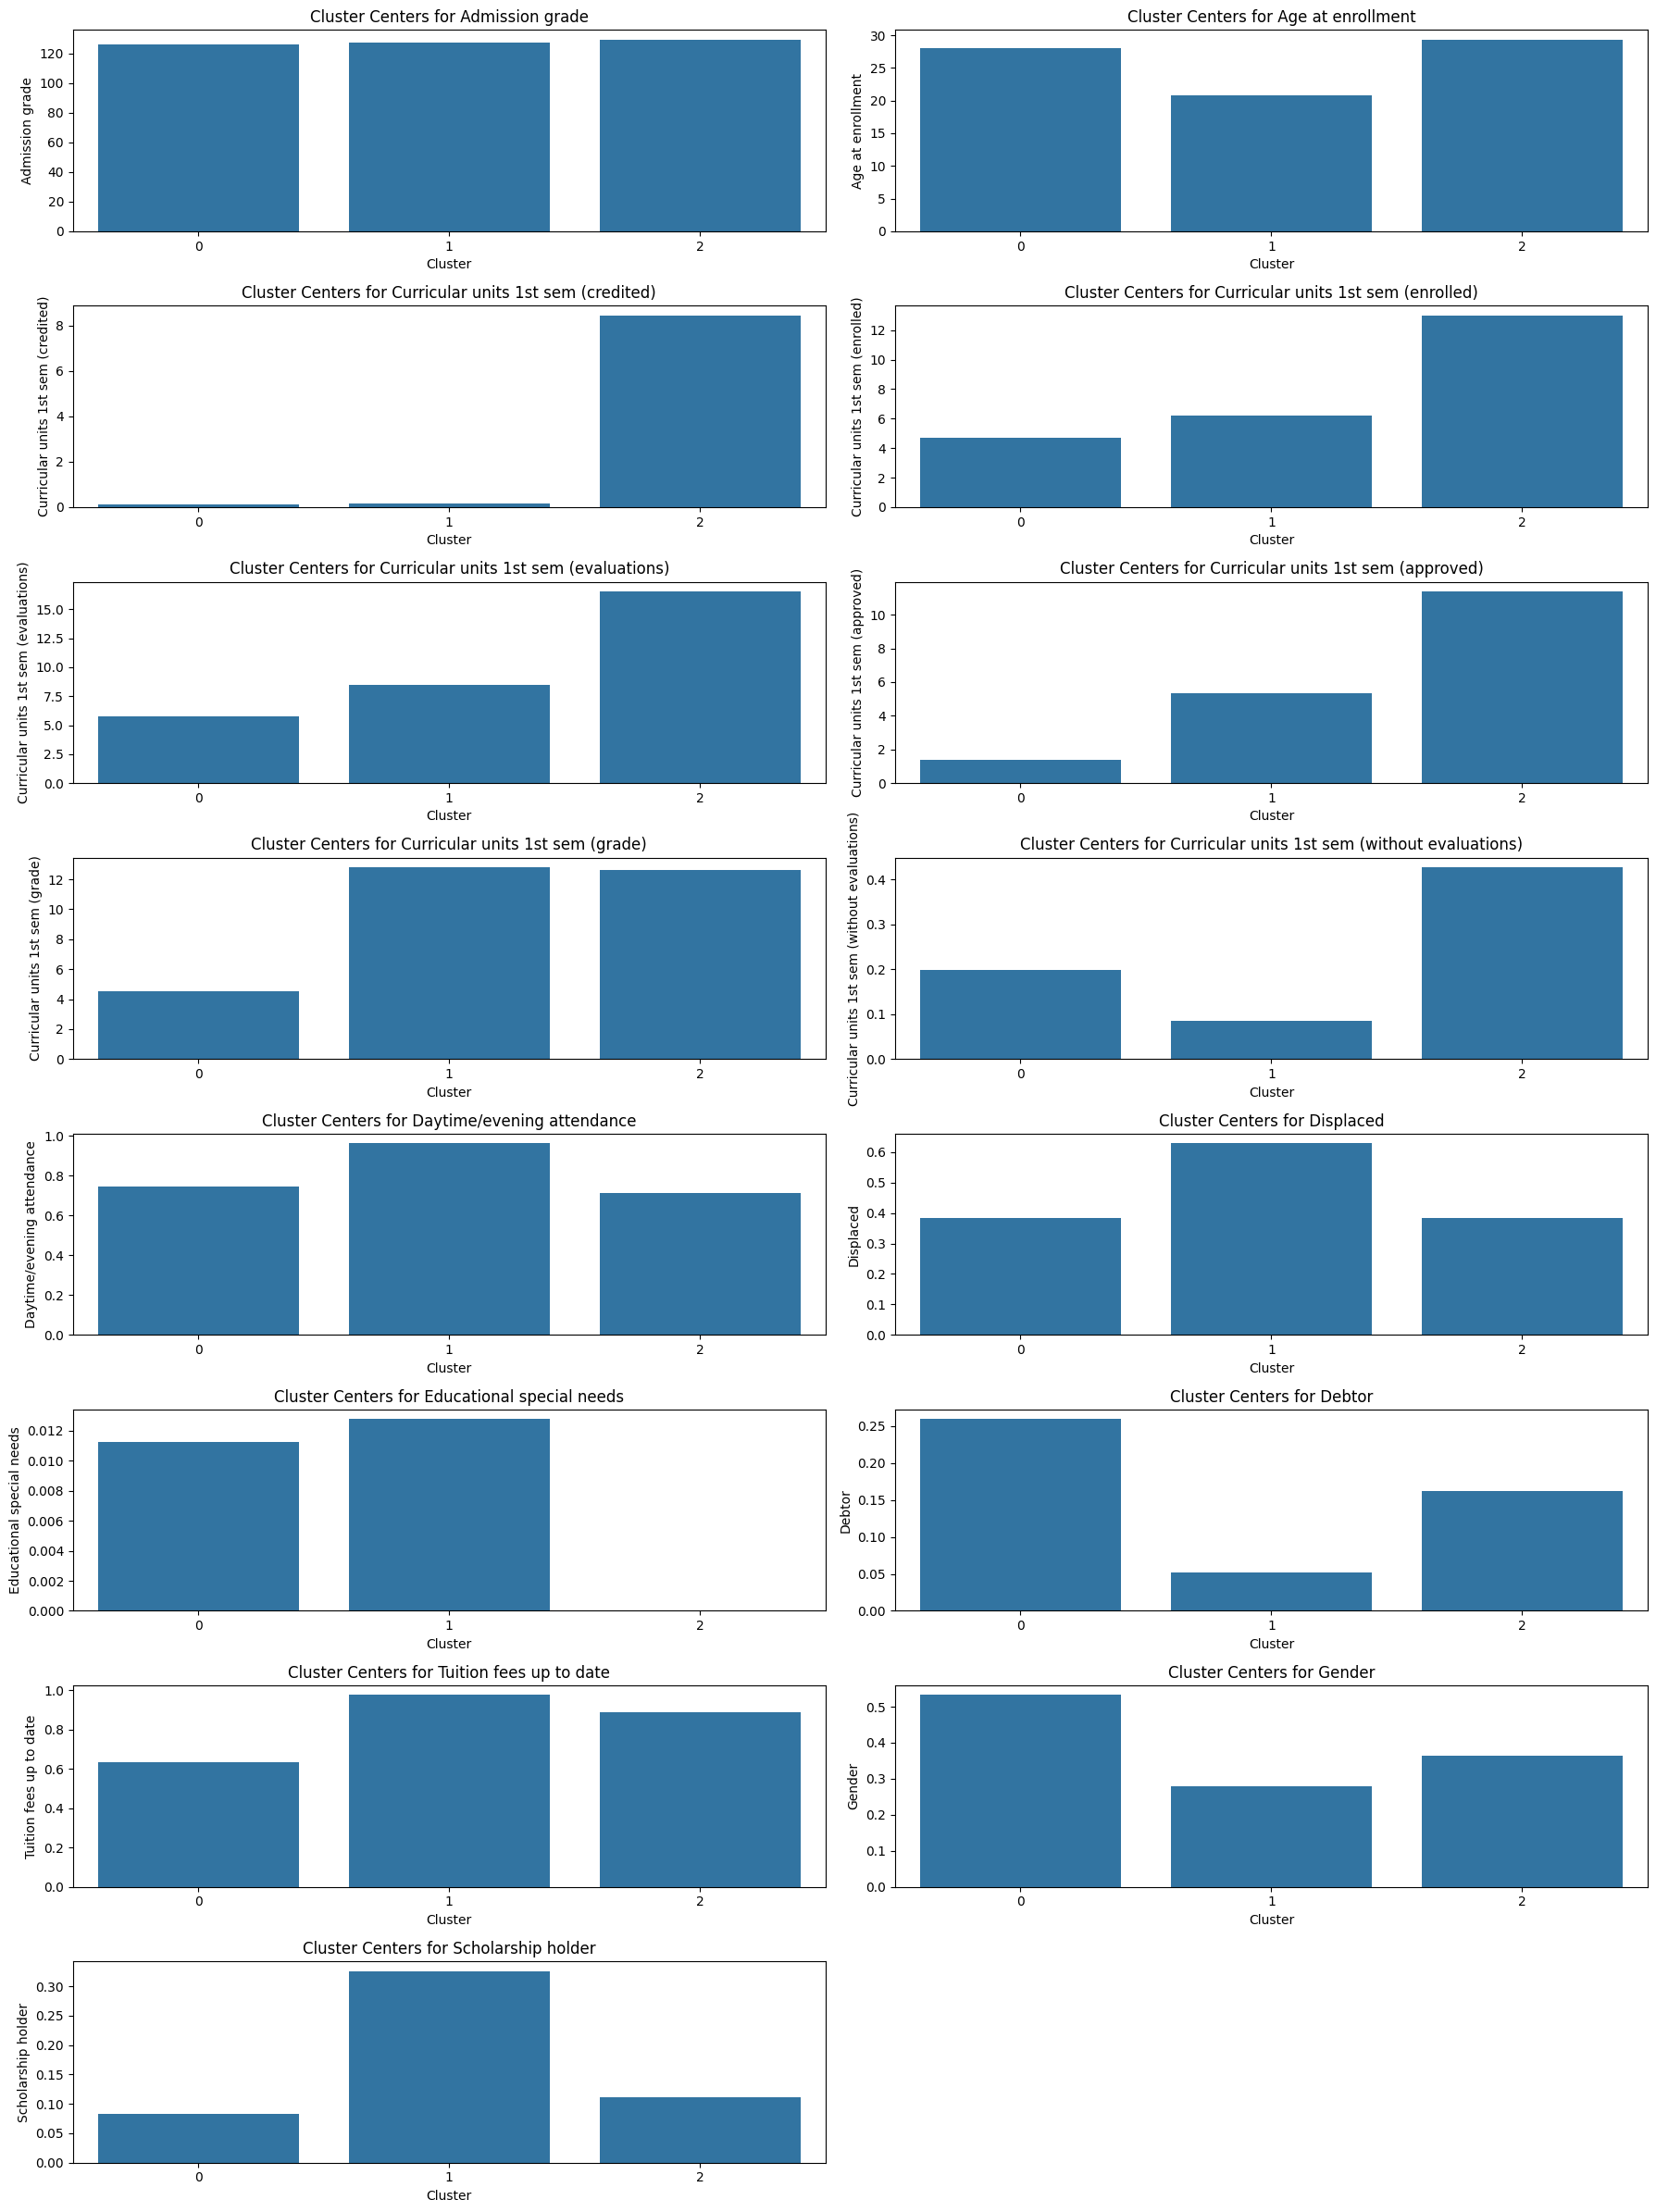

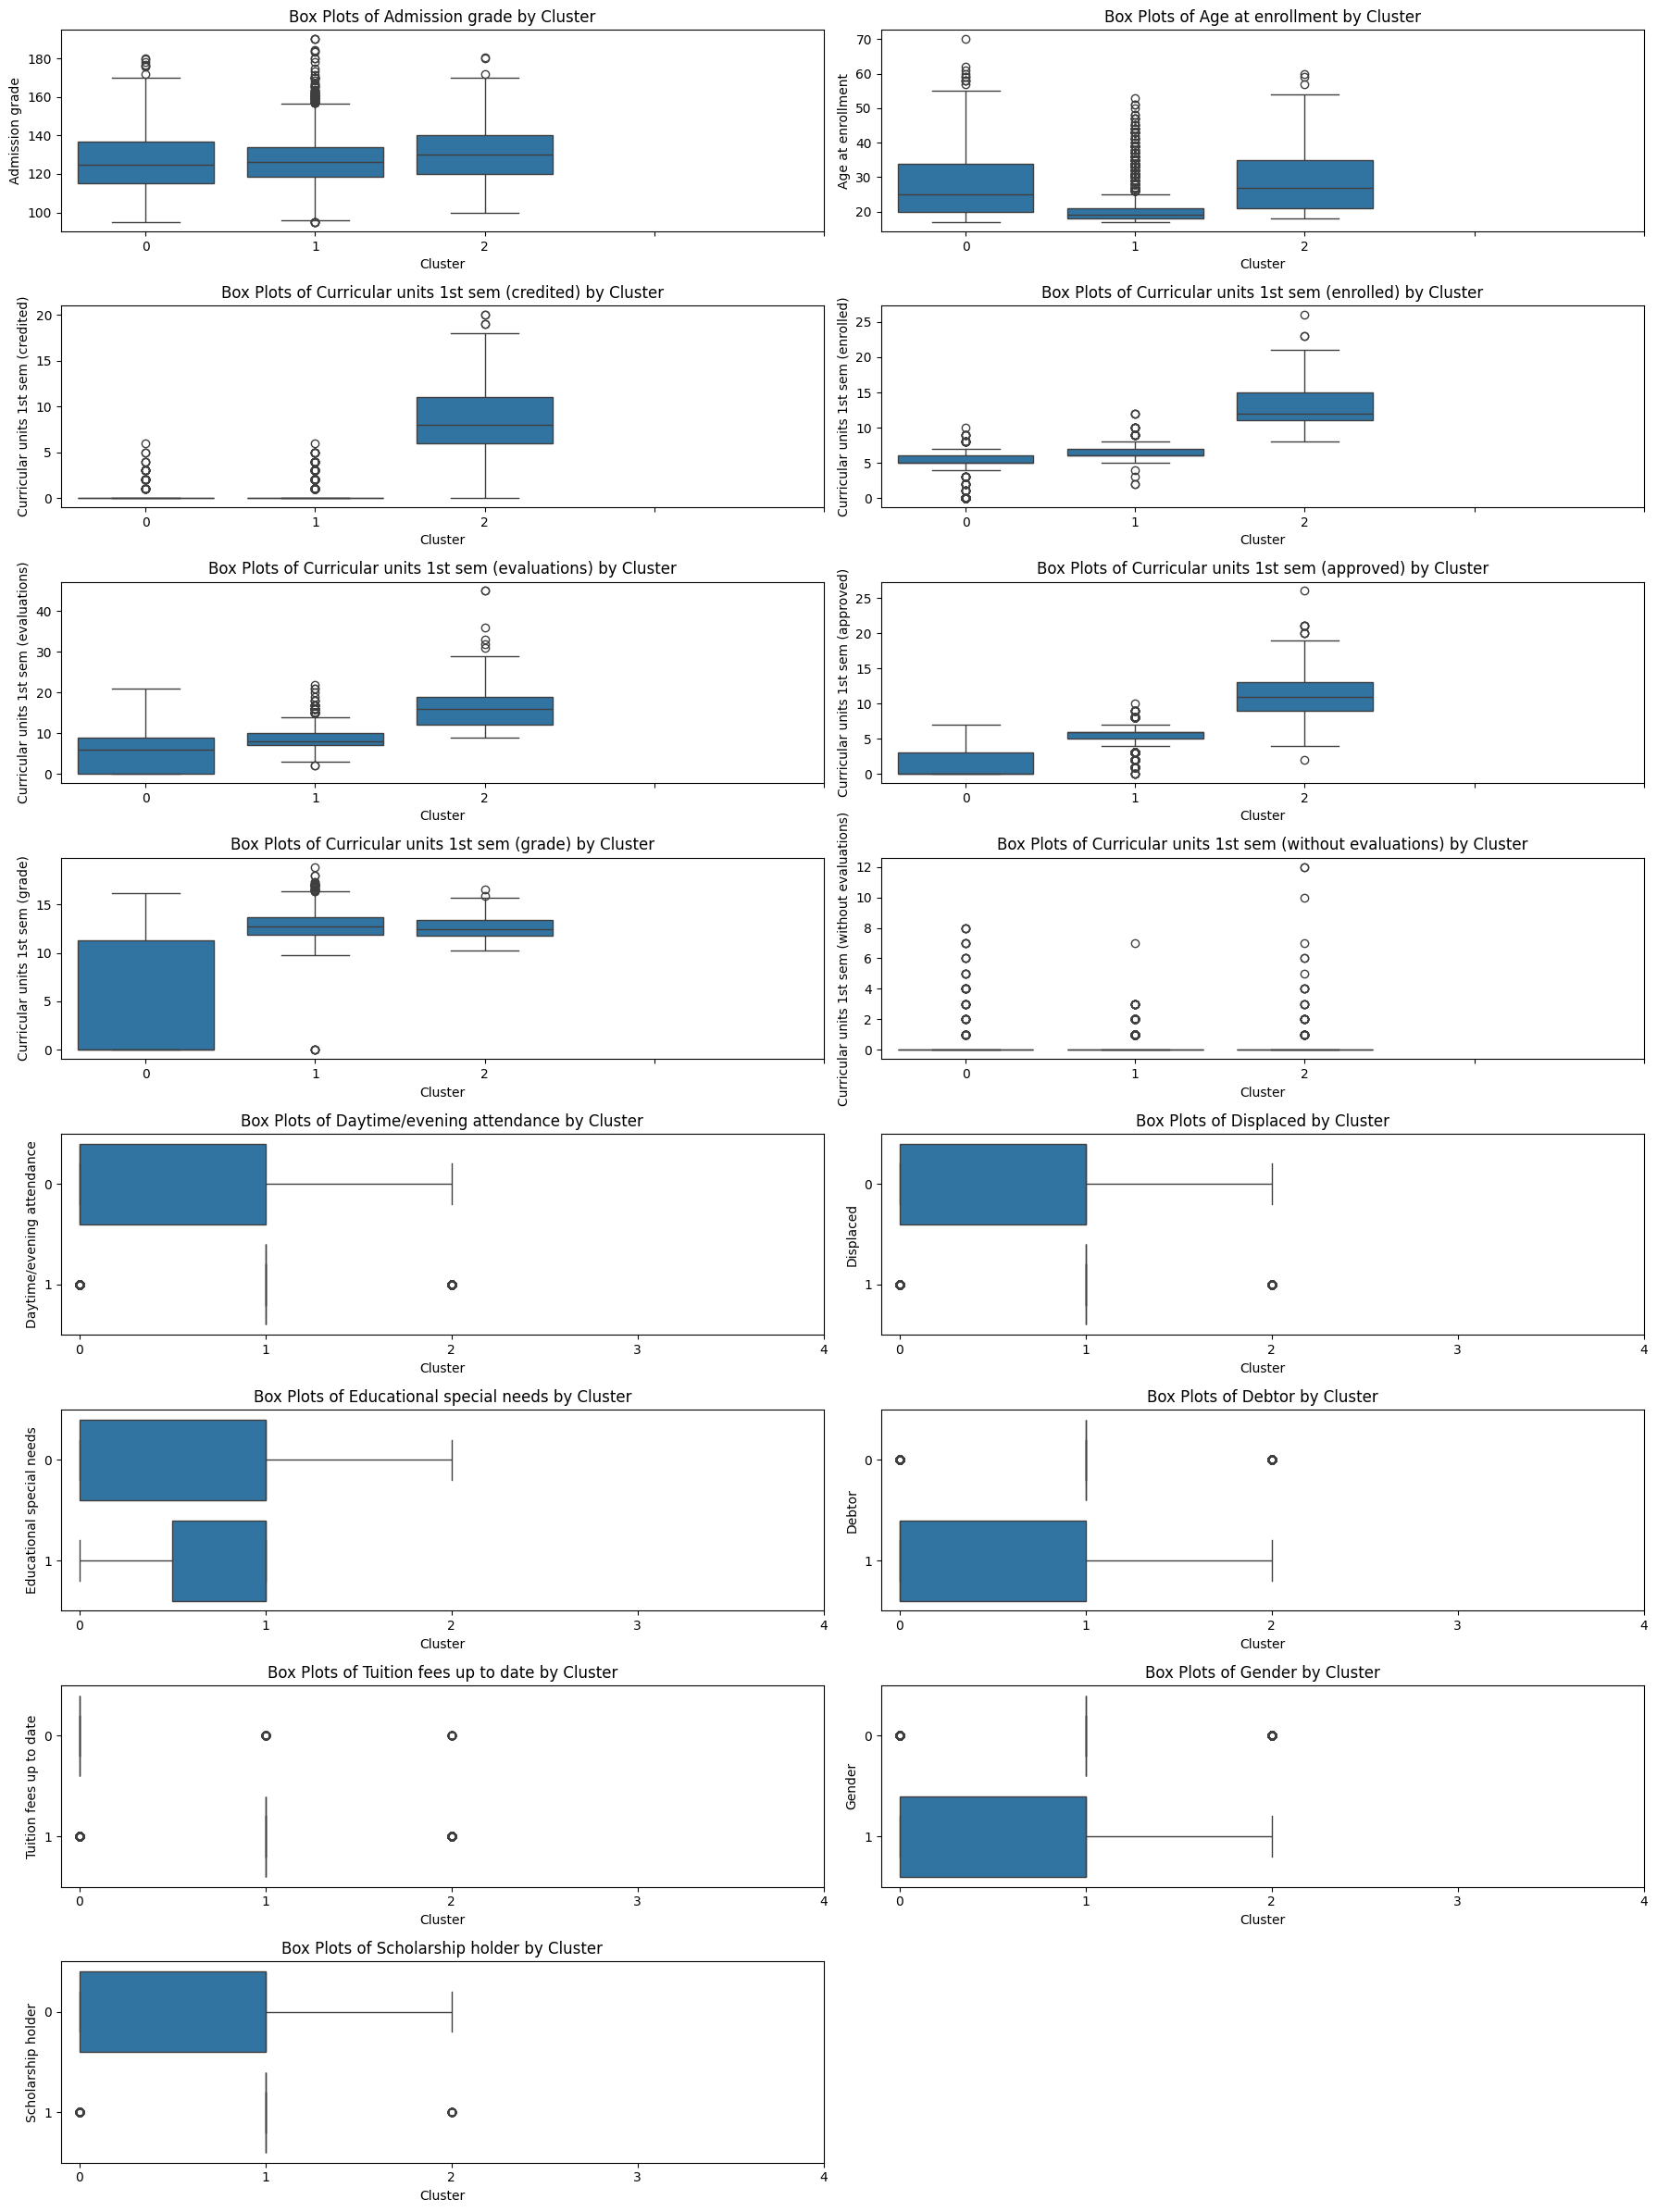

In [23]:
from sklearn.decomposition import PCA

# Define the features to be used in the clustering

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Use PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]

# Visualize the clustering results using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca-one', y='pca-two', hue='cluster', palette='viridis', s=10)
plt.title('PCA of Clusters')
plt.show()

# Transform the PCA components back to the original feature space
original_data = pca.inverse_transform(df[['pca-one', 'pca-two']])
original_data_unscaled = scaler.inverse_transform(original_data)

# Print the center points of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)

# Plot the feature values of each cluster center using bar charts
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(18, 24))
axes = axes.flatten()

for i, feature in enumerate(features):
    
    sns.barplot(x=cluster_centers_df.index, y=cluster_centers_df[feature], ax=axes[i])
    
    axes[i].set_title(f'Cluster Centers for {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Plot the distribution of each feature within clusters using box plots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(18, 24))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='cluster', y=feature, data=df, ax=axes[i])
    
    axes[i].set_title(f'Box Plots of {feature.capitalize()} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature.capitalize())
    axes[i].set_xticks(range(5))

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


#### Analysis and Strategy for Student Clusters

Here are the characteristics and suggested strategies for each group:

##### Cluster 0: Average Performers
- **Characteristics:**
    - Admission grade, Age at enrollment, Curricular units enrolled, credited, evaluated, and approved are average.
    - Moderate number of educational special needs and scholarships.
    - Consistent attendance with moderate levels of daytime/evening attendance.
    - Balanced gender distribution and tuition fees up to date.

- **Strategy:**
  - Provide regular support through tutoring and counseling to maintain their performance.
  - Offer additional learning materials and resources to help improve their grades gradually.
  - Motivate them to participate in extracurricular activities to enhance their overall development.

##### Cluster 1: High Achievers
- **Characteristics:**
  - High admission grades and high curricular units credited and approved.
  - Younger age at enrollment and higher evaluation rates.
  - Lower levels of educational special needs and fewer debtor issues.
  - High attendance and high scholarship holder percentage.
  - Equal gender distribution and tuition fees up to date.

- **Strategy:**
  - Offer advanced courses, leadership programs, and research opportunities to keep them challenged.
  - Implement recognition programs and awards to keep them motivated.
  - Pair them with mentors and professionals in their field of interest for guidance and inspiration.

##### Cluster 2: At-Risk Students
- **Characteristics:**
  - Lower admission grades and lower curricular units credited and approved.
  - Higher age at enrollment and lower evaluation rates.
  - Higher levels of educational special needs and higher debtor issues.
  - Lower attendance and fewer scholarship holders.
  - Displaced students with tuition fees often not up to date.

- **Strategy:**
  - Implement targeted interventions such as remedial classes and special support programs to address their academic needs.
  - Provide financial assistance and counseling to address debt issues and ensure tuition fees are up to date.
  - Create engagement programs to increase their participation and attendance, including personalized learning plans and motivational workshops.



### 6. Conclusion

In this project, I analyzed an apartment dataset, focusing on data cleaning, transformation, and visualization. By using K-Means clustering, I categorized the students into three distinct groups and proposed strategies for each.

I integrated complex data descriptions into the program, creating rules to check data validity. I also learned how to merge numerous small categories into meaningful ones to aid data analysis. Visualizing data helps quickly identify patterns. Clustering is a useful tool for grouping large datasets, which helped me understand the data better during the process.

This project provided me with valuable insights and a deeper understanding of data analysis and its practical applications.
